In [1]:
import numpy as np
import pandas as pd

np.random.seed(1004)

import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_794249/312844030.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import sys
import importlib
sys.path.append('../')

import model, evaluations, data, utils, data_hp
importlib.reload(model)
importlib.reload(evaluations)
importlib.reload(data)
importlib.reload(utils)
importlib.reload(data_hp)

2024-05-13 17:36:30.342283: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 17:36:30.378408: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 17:36:30.378432: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-13 17:36:30.378453: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-13 17:36:30.384494: I tensorflow/core/platform/cpu_feature_g

<module 'data_hp' from '/home/ylee/WirelessSensor2024/DataAnalysis/../data_hp.py'>

# Prepare Data

In [3]:
# create large size of data
data_size = data_hp.data_size_train

## Nakagami Data

In [4]:
# Nakagami train data parameter is slightly diffrent from the test to prevent extreme value (outlier)
# And this helps the model train much better.
# But we need the original Nakagami, thus using the test.

dict_n1_test = data_hp.dict_n1_test
dict_n2_test = data_hp.dict_n2_test

# n1 (default)
con_n1_test = data.Nakagami(
    m_array=dict_n1_test["m_array"],
    eta=dict_n1_test["eta"],
    Pt=dict_n1_test["Pt"],
    alpha=dict_n1_test["alpha"],
    d_0=dict_n1_test["d_0"],
    d_array=dict_n1_test["d_array"],
    noise=dict_n1_test["noise"],
    low=dict_n1_test["low"],
    high=dict_n1_test["high"],
) 

# n2
con_n2_test = data.Nakagami(
    m_array=dict_n2_test["m_array"],
    eta=dict_n2_test["eta"],
    Pt=dict_n2_test["Pt"],
    alpha=dict_n2_test["alpha"],
    d_0=dict_n2_test["d_0"],
    d_array=dict_n2_test["d_array"],
    noise=dict_n2_test["noise"],
    low=dict_n2_test["low"],
    high=dict_n2_test["high"],
) 

In [5]:
n1_data, n1_condition, n1_indices = con_n1_test.generate(data_size)
n1_data_log_scaled = utils.log_transform_n(n1_data)
df_n1_genuine = pd.DataFrame(
    np.hstack((n1_data, n1_indices, n1_data_log_scaled)), 
    columns=['original_data', 'd', 'scaled_data'],
)

n2_data, n2_condition, n2_indices = con_n2_test.generate(data_size)
n2_data_log_scaled = utils.log_transform_n(n2_data)
df_n2_genuine = pd.DataFrame(
    np.hstack((n2_data, n2_indices, n2_data_log_scaled)), 
    columns=['original_data', 'd', 'scaled_data'],
)

## LogNormal Data

In [6]:
dict_ln1 = data_hp.dict_ln1
dict_ln2 = data_hp.dict_ln2

# ln1 | urban (default)
con_ln1 = data.LogNormal(
    eta=dict_ln1["eta"],
    Pt=dict_ln1["Pt"],
    alpha_1=dict_ln1["alpha_1"],
    alpha_2=dict_ln1["alpha_2"],
    delta_1=dict_ln1["delta_1"],
    delta_2=dict_ln1["delta_2"],
    d_0=dict_ln1["d_0"],
    d_c=dict_ln1["d_c"],
    d_array=dict_ln1["d_array"],
) 

# ln2 | rural
con_ln2 = data.LogNormal(
    eta=dict_ln2["eta"],
    Pt=dict_ln2["Pt"],
    alpha_1=dict_ln2["alpha_1"],
    alpha_2=dict_ln2["alpha_2"],
    delta_1=dict_ln2["delta_1"],
    delta_2=dict_ln2["delta_2"],
    d_0=dict_ln2["d_0"],
    d_c=dict_ln2["d_c"],
    d_array=dict_ln2["d_array"],
) 

In [7]:
ln1_data, ln1_indices = con_ln1.generate(number=data_size)
ln1_data_log_scaled = utils.log_transform_ln(ln1_data)
df_ln1_genuine = pd.DataFrame(
    np.hstack((ln1_data, ln1_indices, ln1_data_log_scaled)), 
    columns=['original_data', 'd', 'scaled_data'],
)

ln2_data, ln2_indices = con_ln2.generate(number=data_size)
ln2_data_log_scaled = utils.log_transform_ln(ln2_data)
df_ln2_genuine = pd.DataFrame(
    np.hstack((ln2_data, ln2_indices, ln2_data_log_scaled)), 
    columns=['original_data', 'd', 'scaled_data'],
)

In [8]:
# Nan Detection
utils.nan_value_detector(n1_data_log_scaled)
utils.nan_value_detector(n2_data_log_scaled)
utils.nan_value_detector(ln1_data_log_scaled)
utils.nan_value_detector(ln2_data_log_scaled)

# PDF Visualization | Genuine : Original VS Scaled

## Nakagami 1

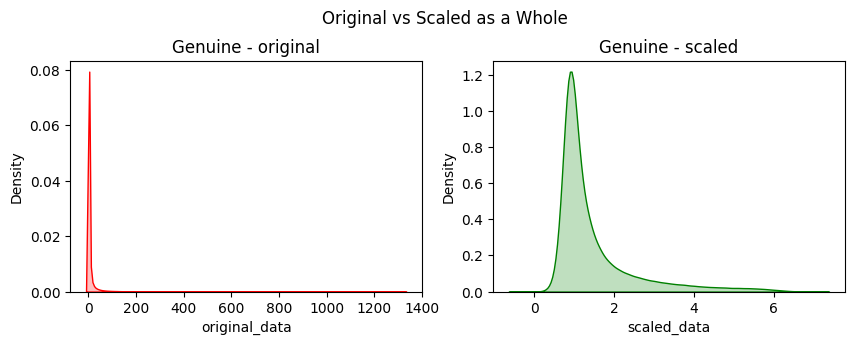

In [9]:
utils.plot_original_and_scaled_data(df_n1_genuine)

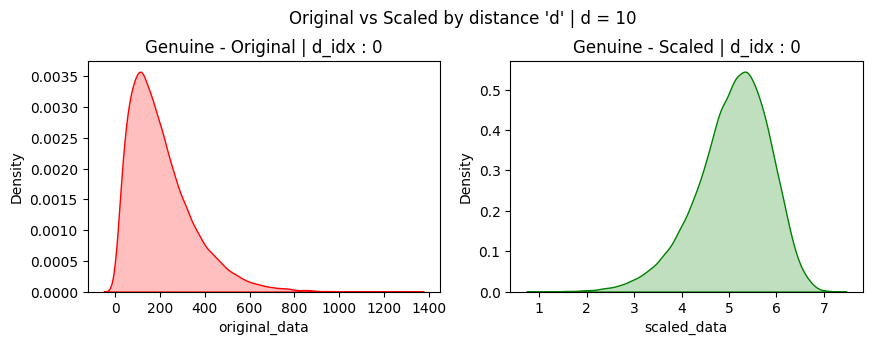

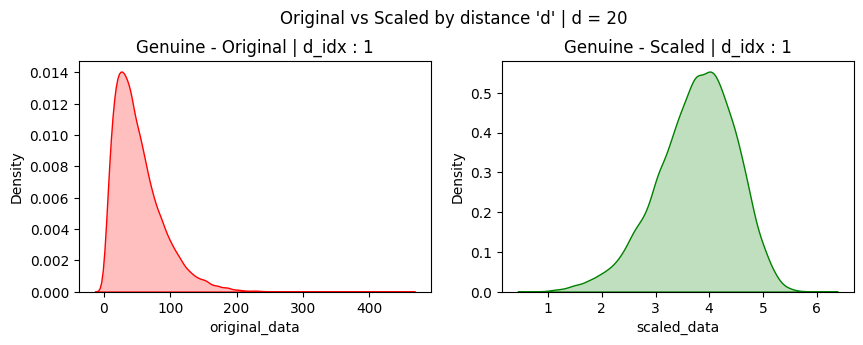

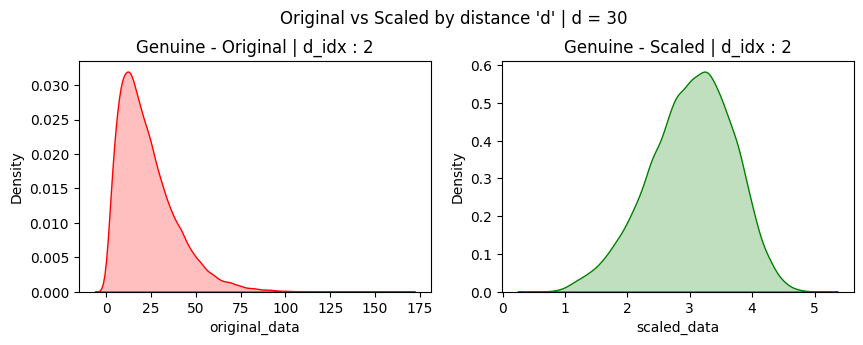

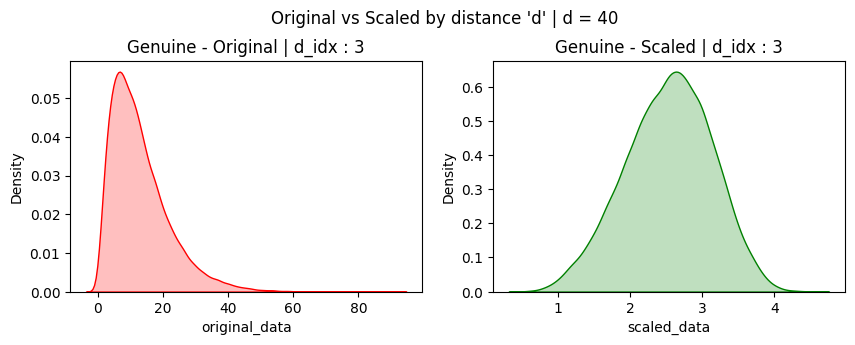

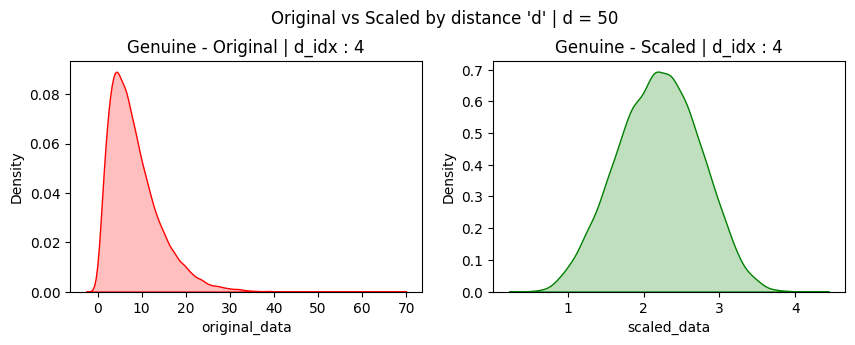

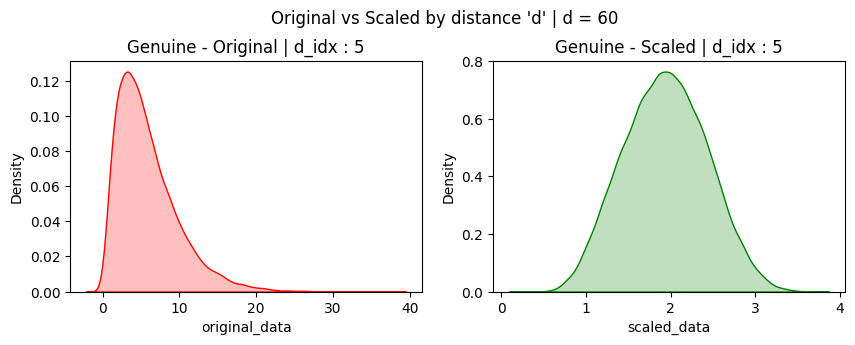

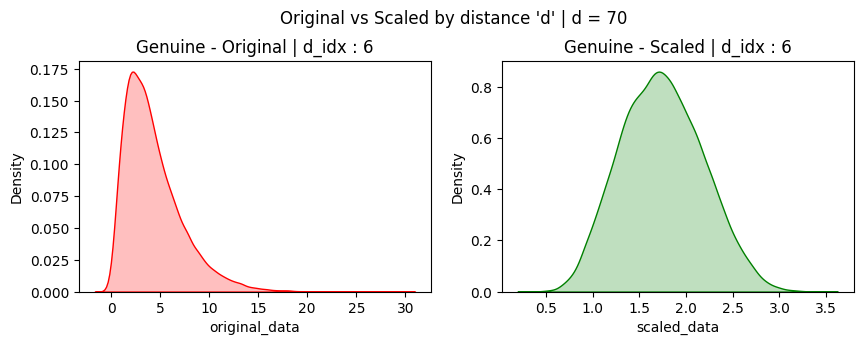

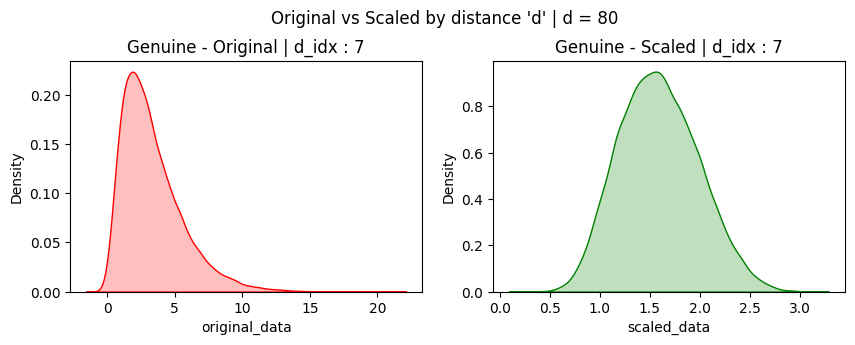

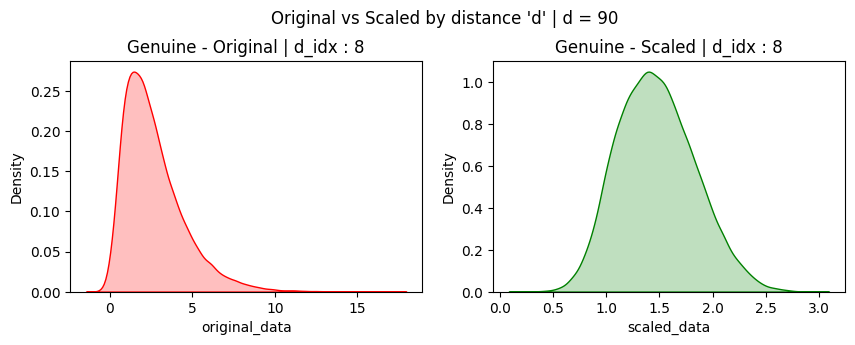

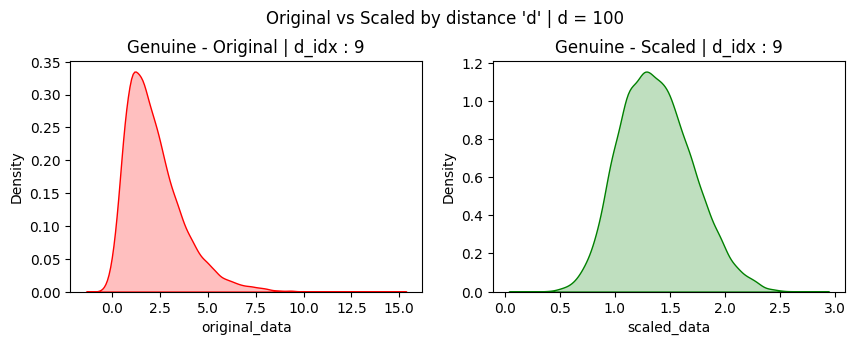

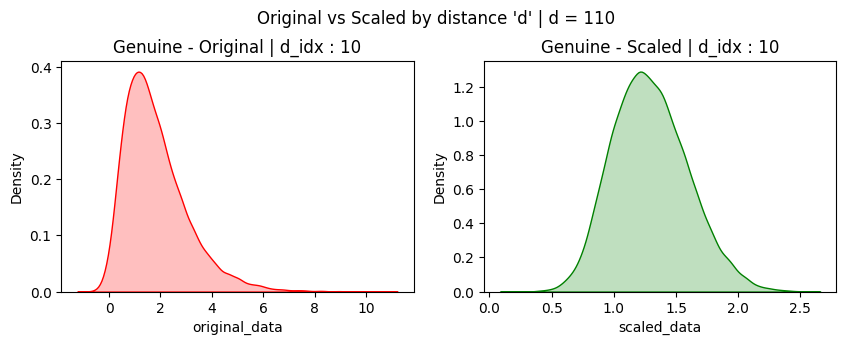

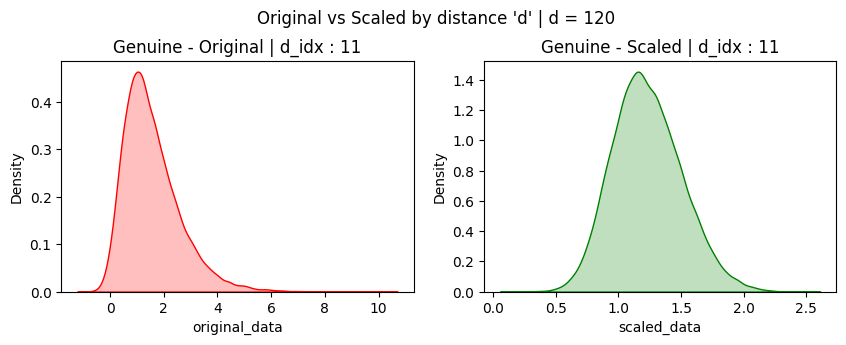

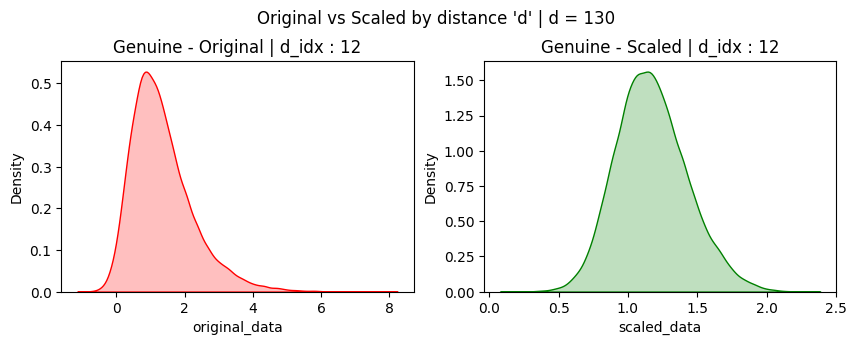

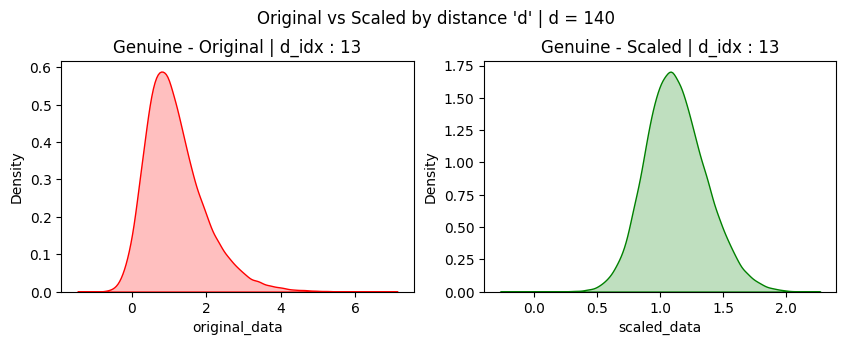

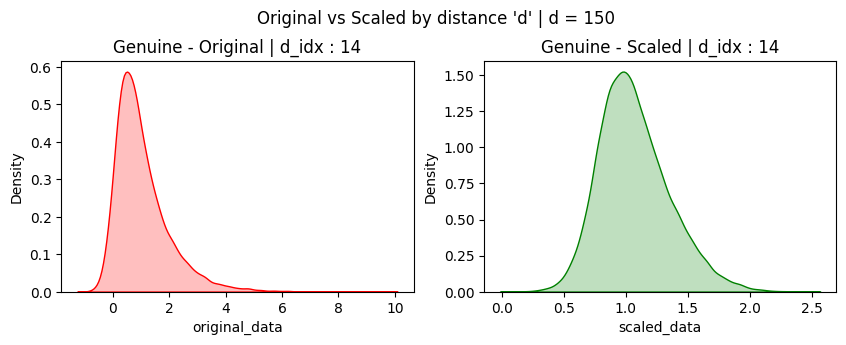

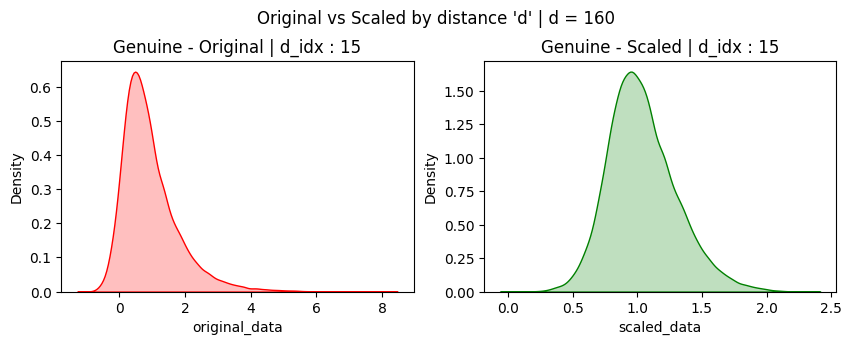

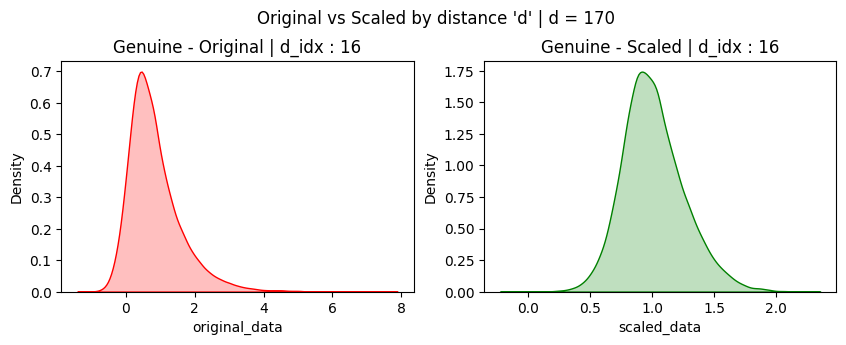

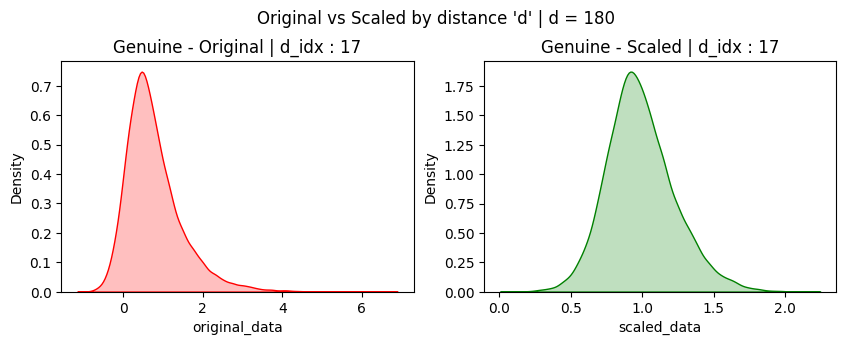

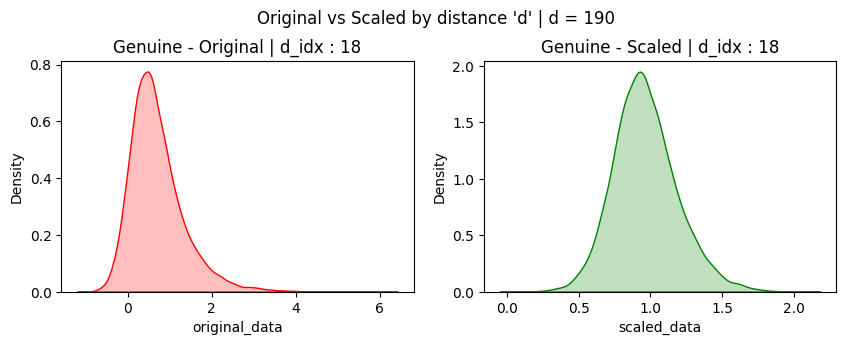

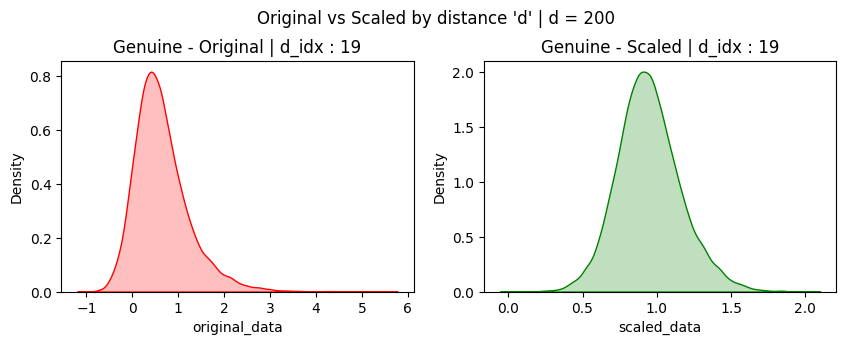

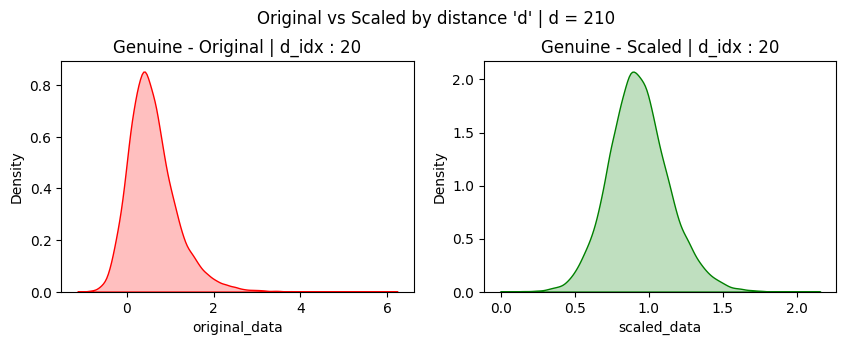

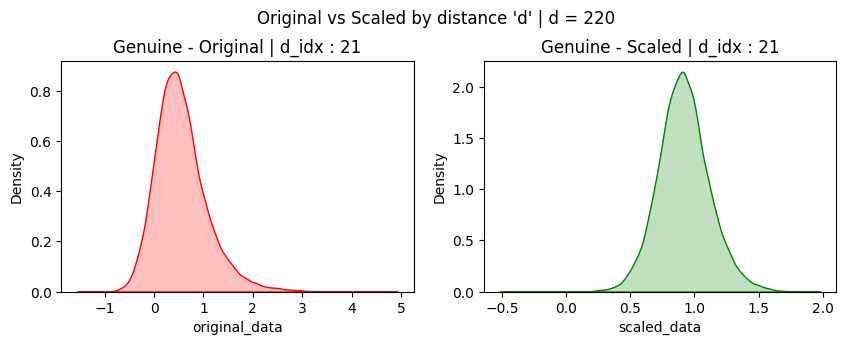

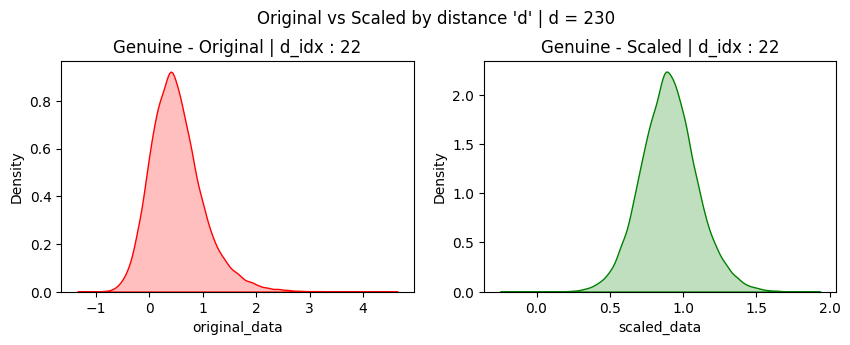

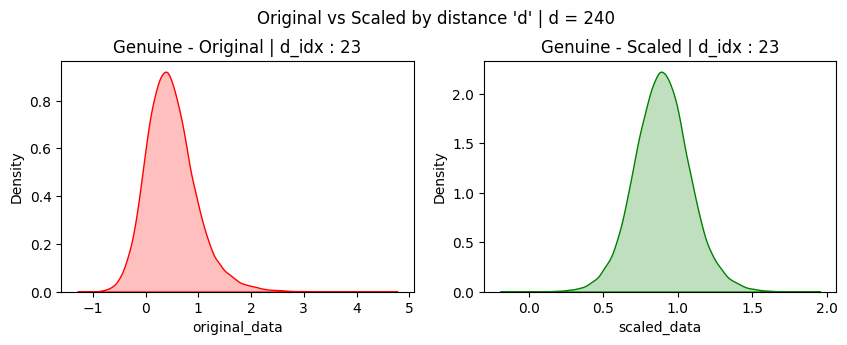

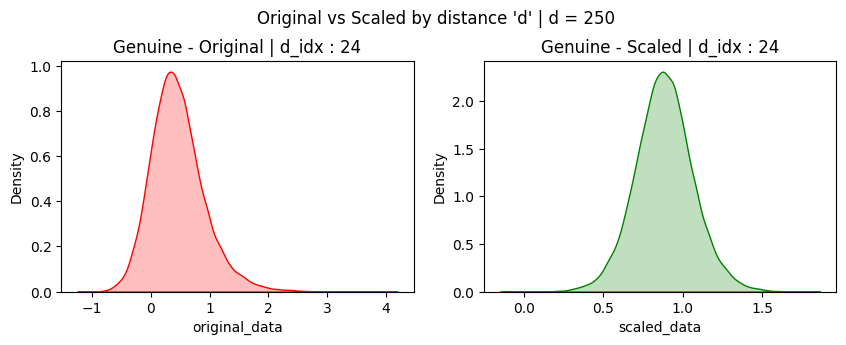

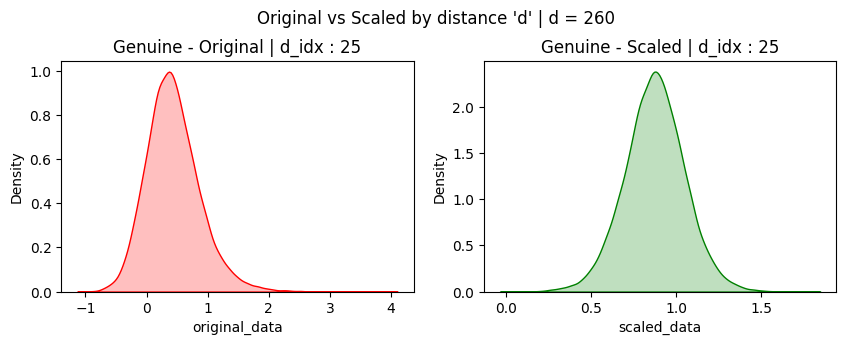

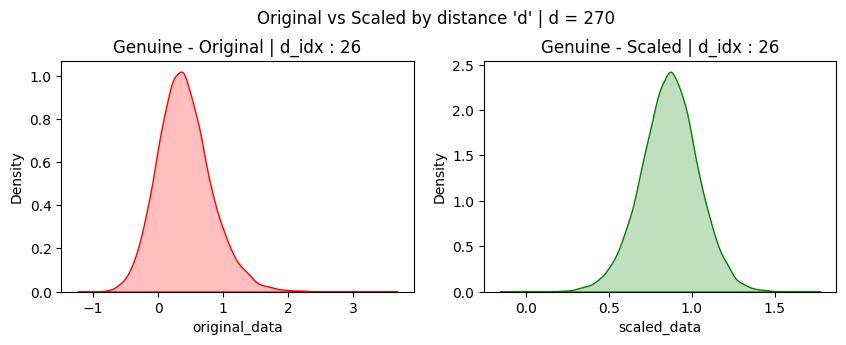

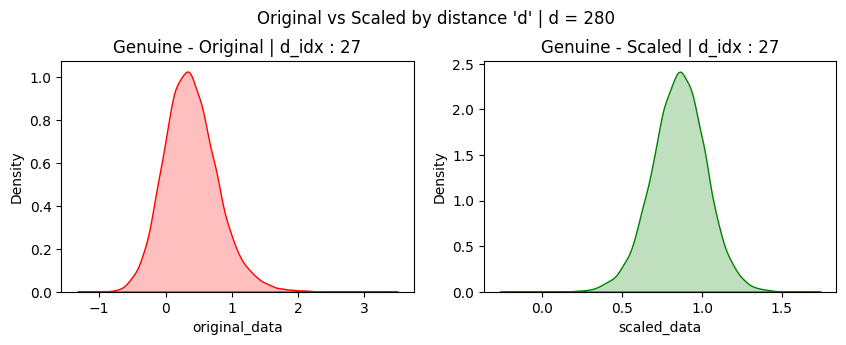

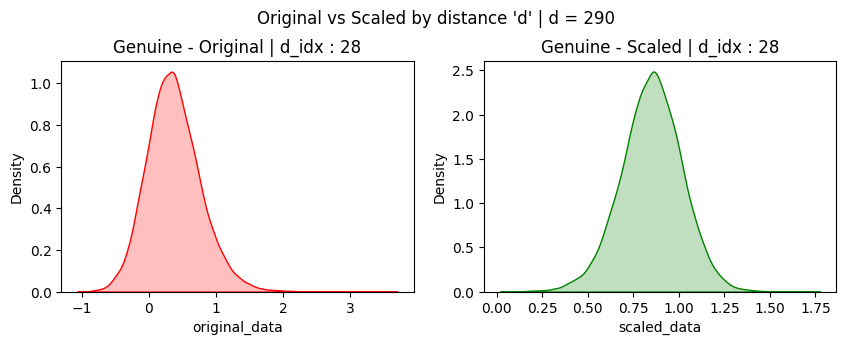

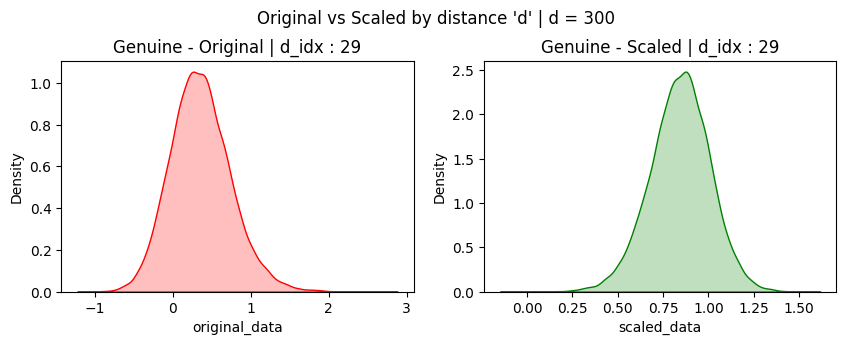

In [10]:
utils.plot_original_and_scaled_data_by_d(df_n1_genuine)

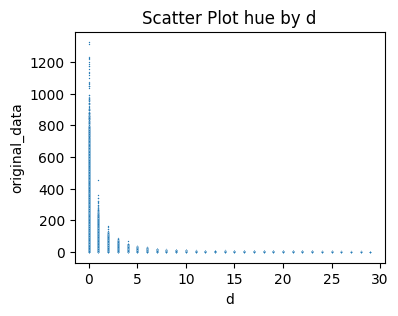

In [11]:
utils.plot_data_distribution_by_d(df_n1_genuine)

## Nakagami 2

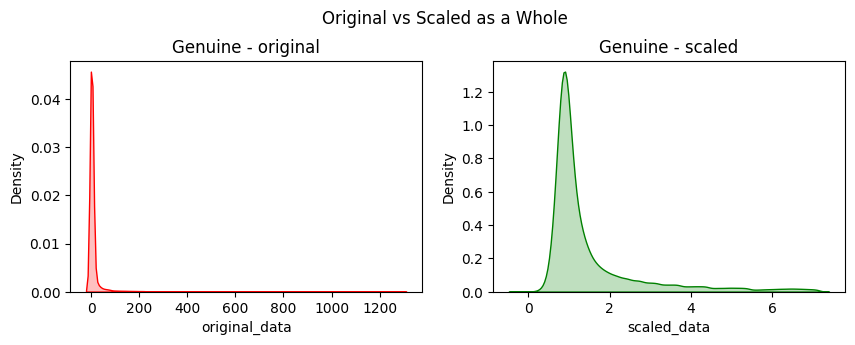

In [12]:
utils.plot_original_and_scaled_data(df_n2_genuine)

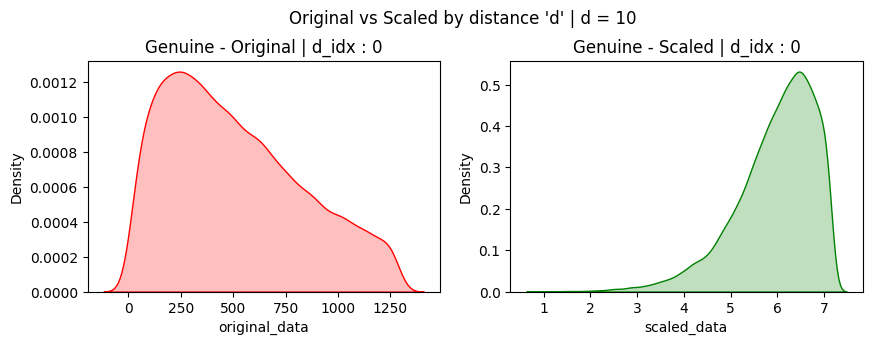

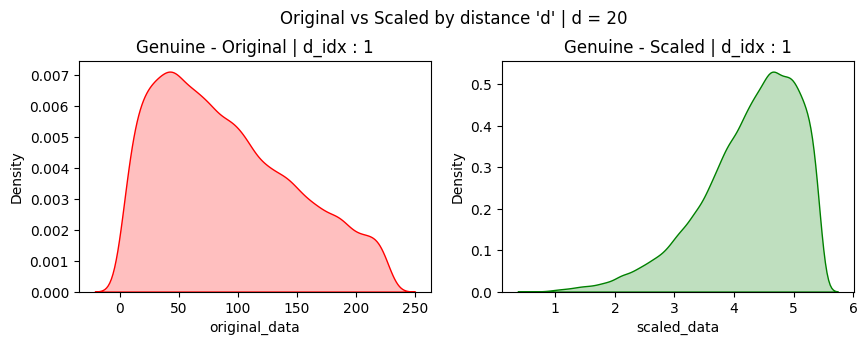

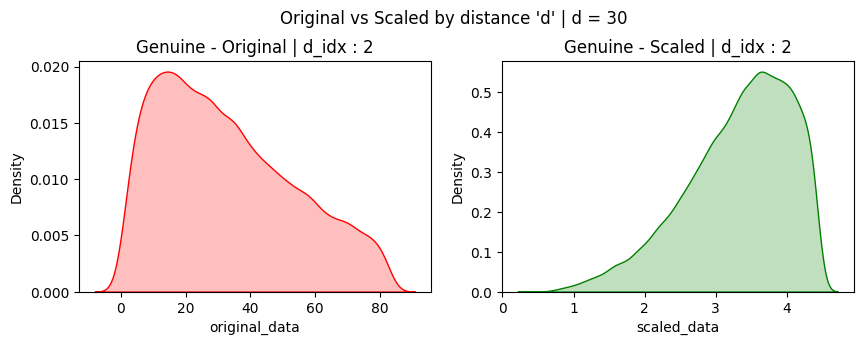

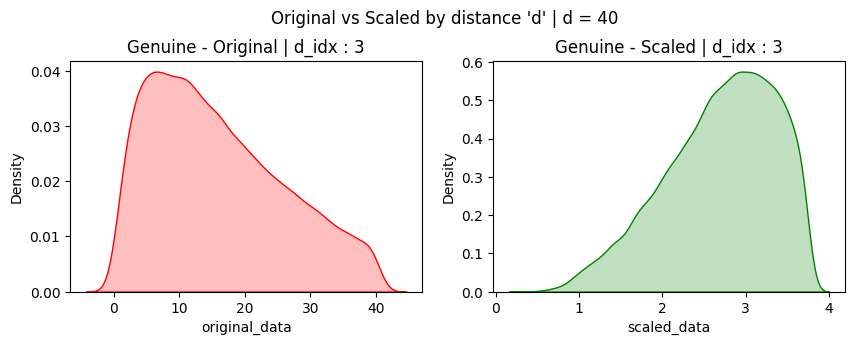

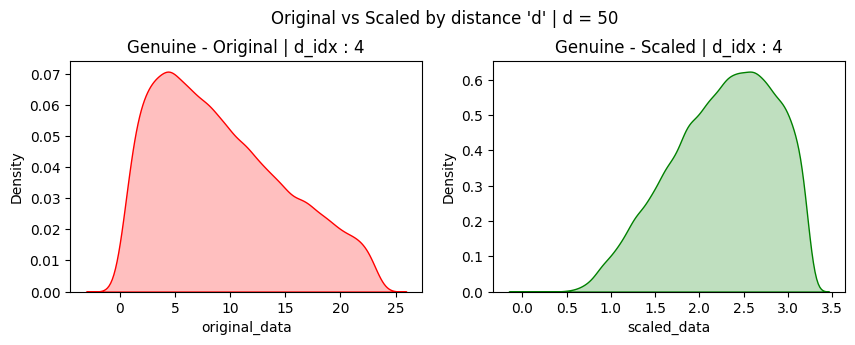

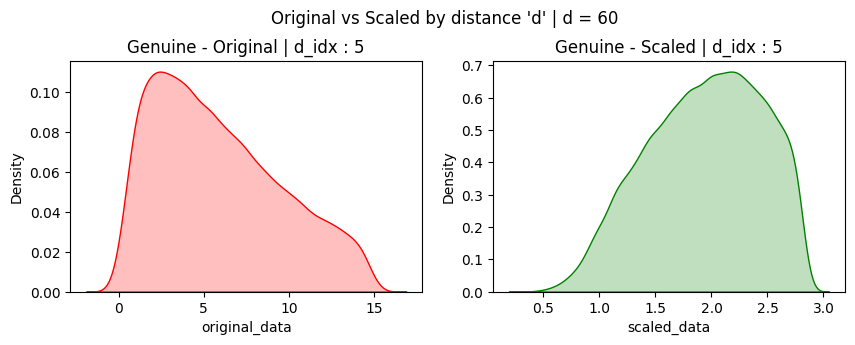

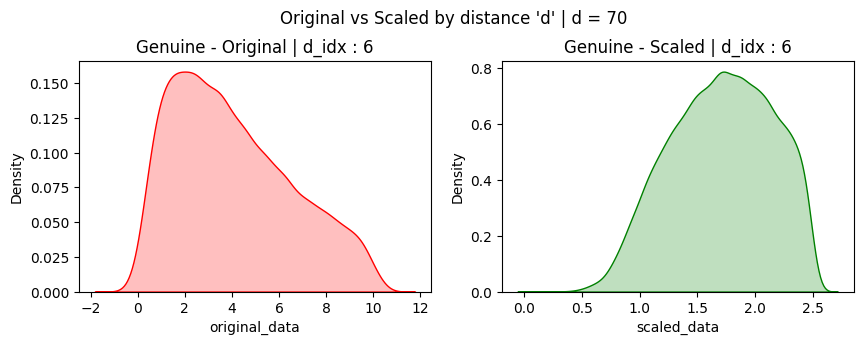

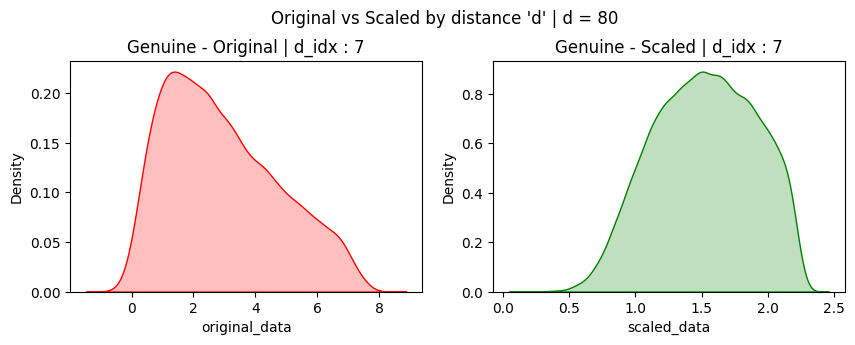

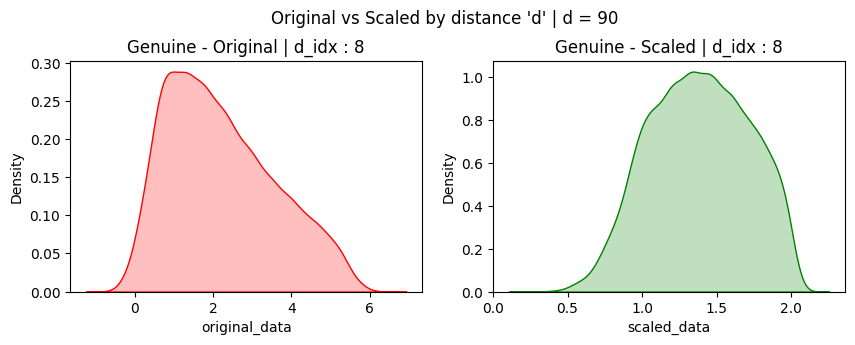

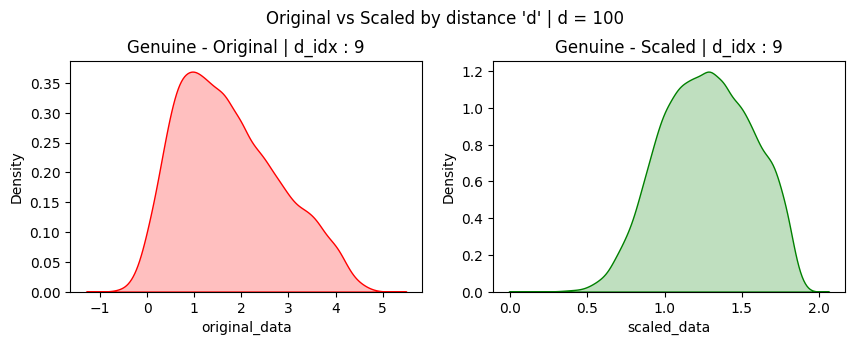

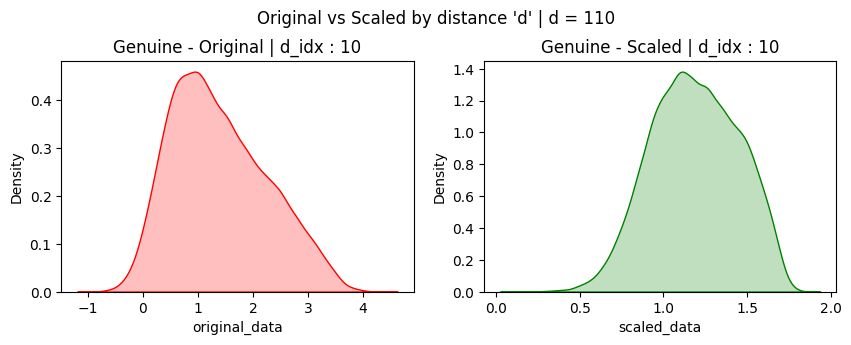

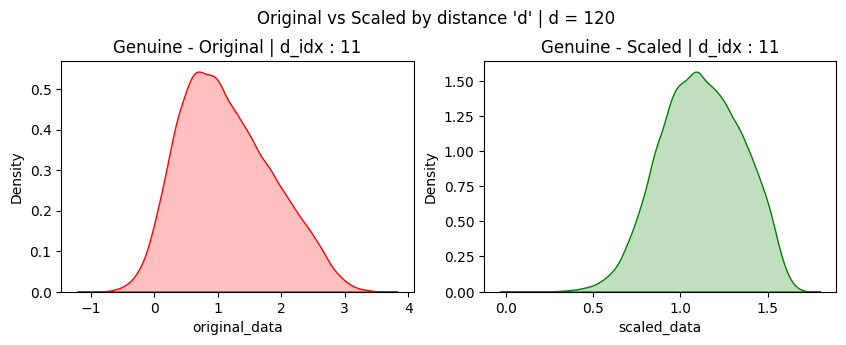

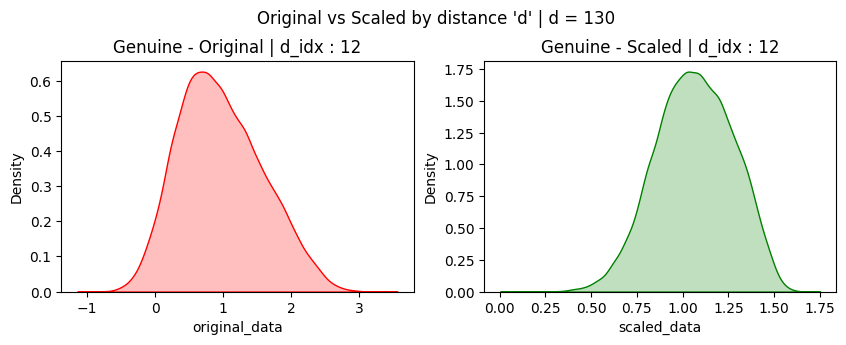

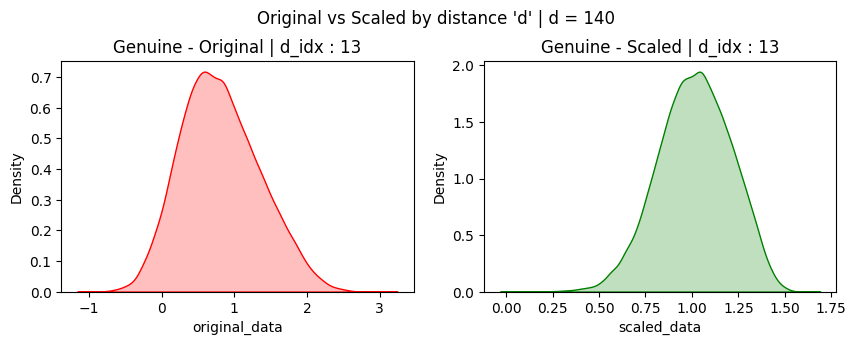

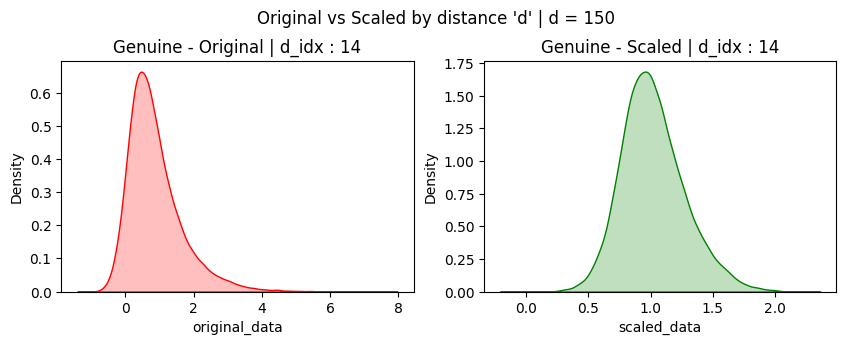

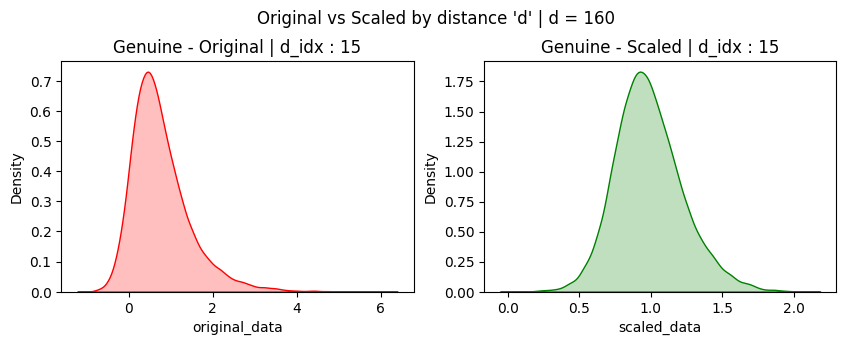

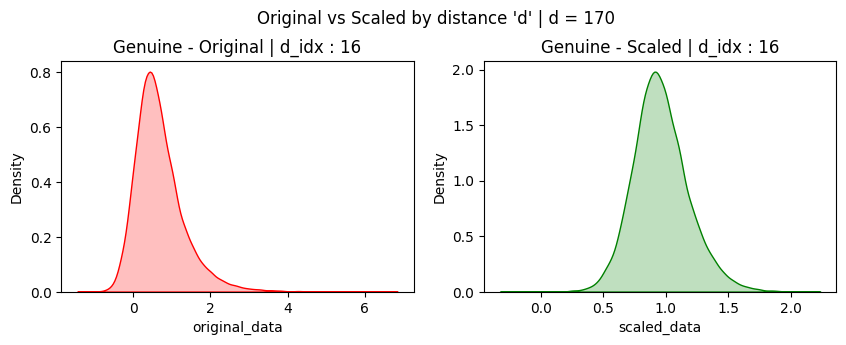

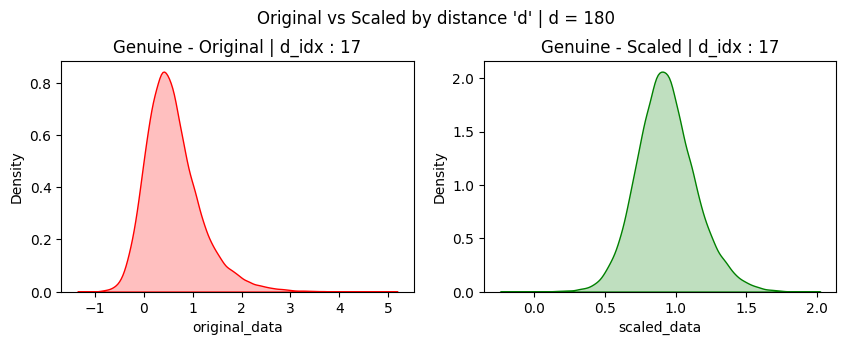

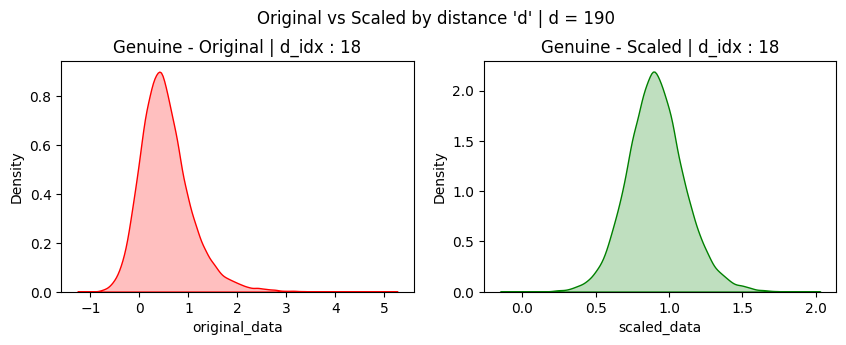

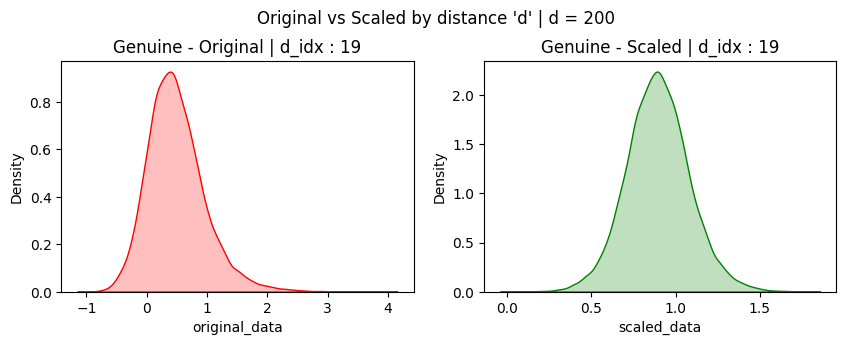

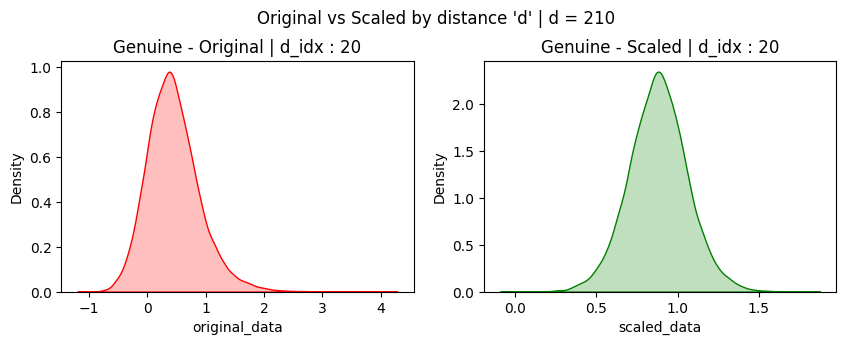

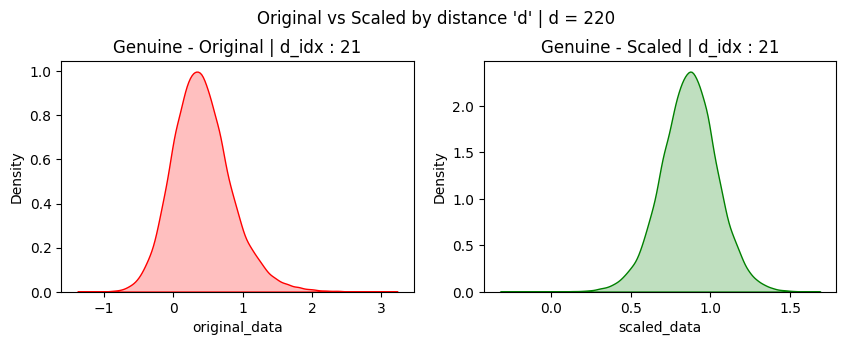

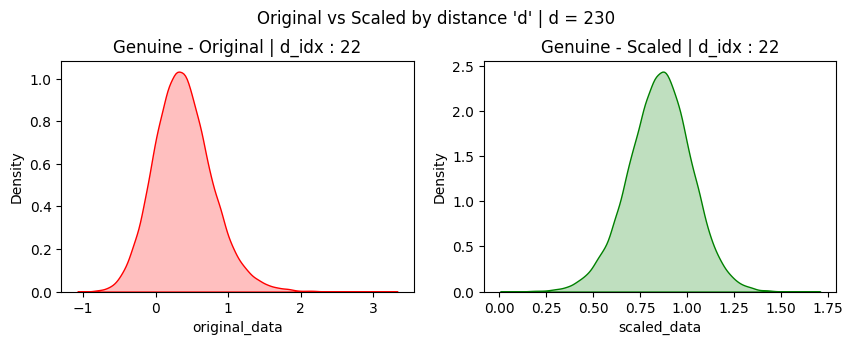

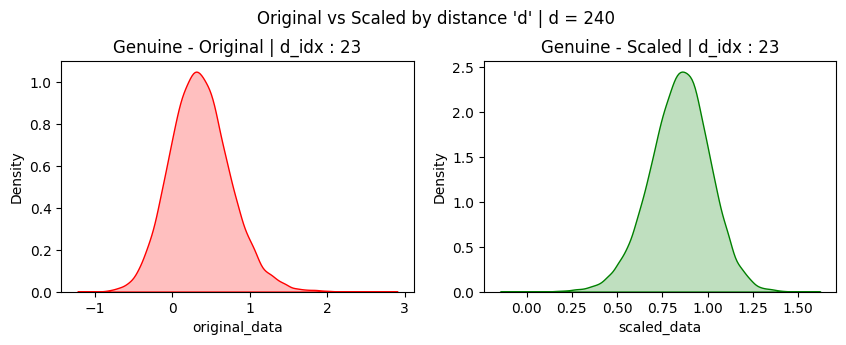

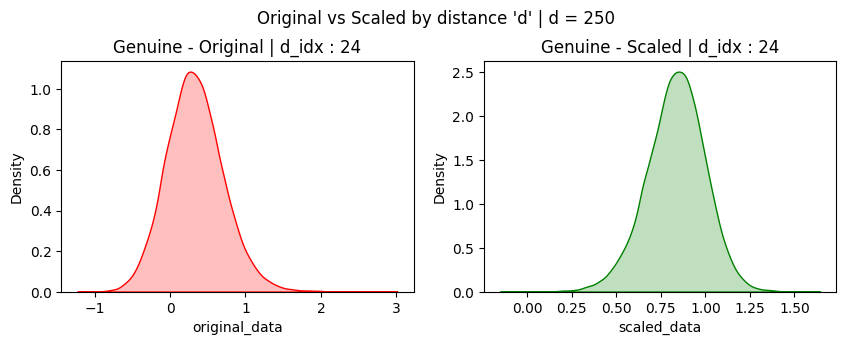

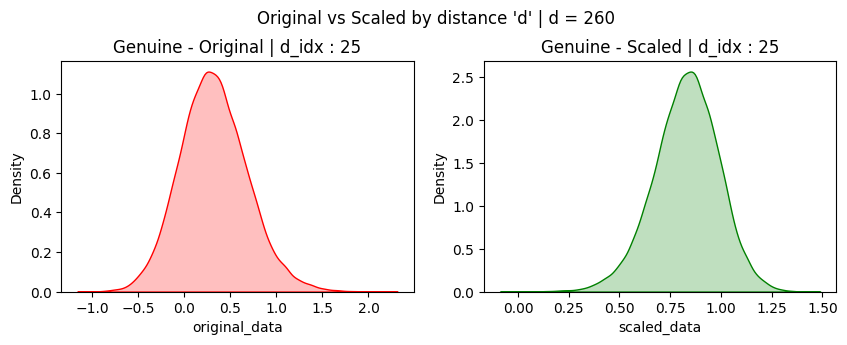

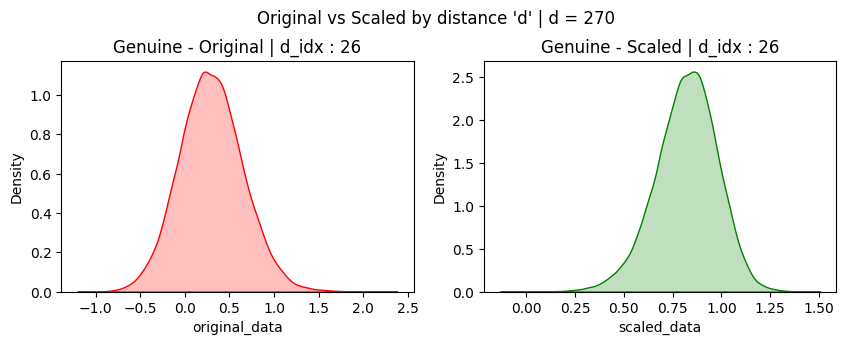

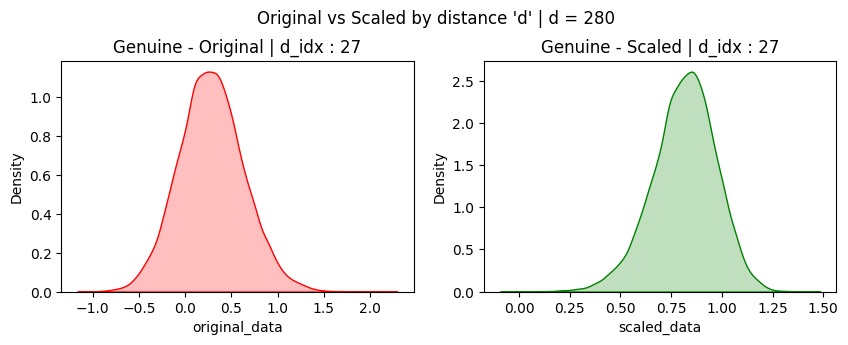

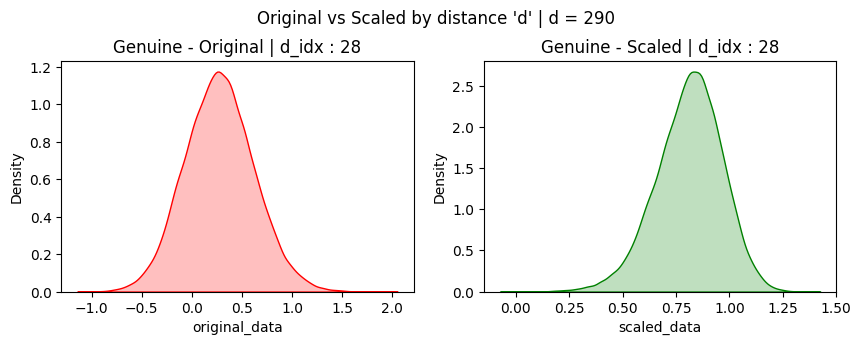

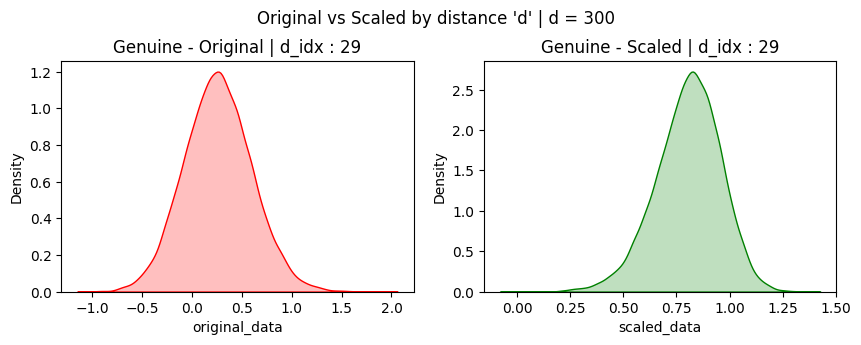

In [13]:
utils.plot_original_and_scaled_data_by_d(df_n2_genuine)

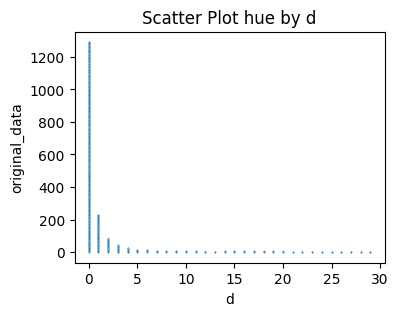

In [14]:
utils.plot_data_distribution_by_d(df_n2_genuine)

## LogNormal 1

<Axes: xlabel='scaled_data', ylabel='Density'>

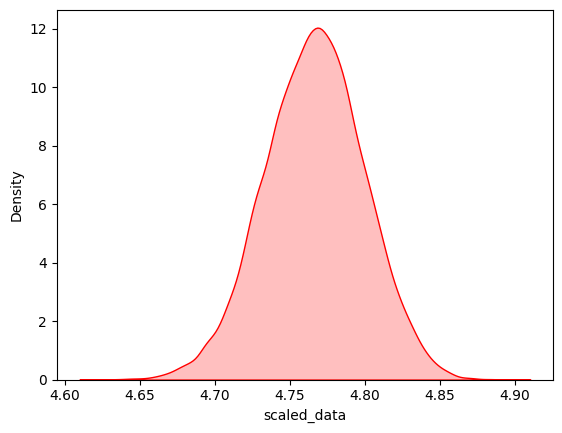

In [15]:
sns.kdeplot(data=df_ln1_genuine[df_ln1_genuine['d'] == 3], x='scaled_data', 
                fill=True, color='red')

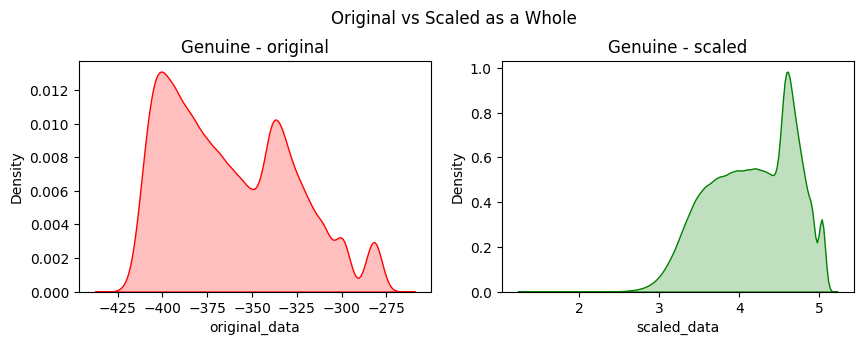

In [16]:
utils.plot_original_and_scaled_data(df_ln1_genuine)

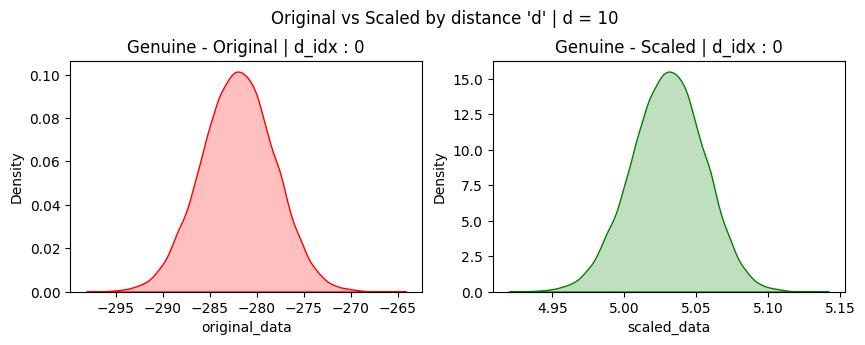

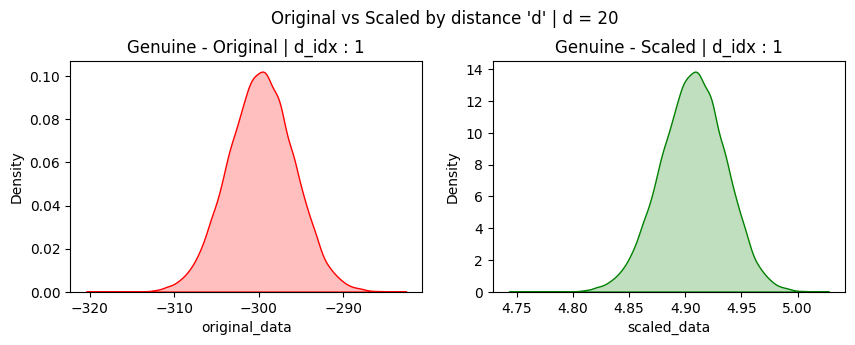

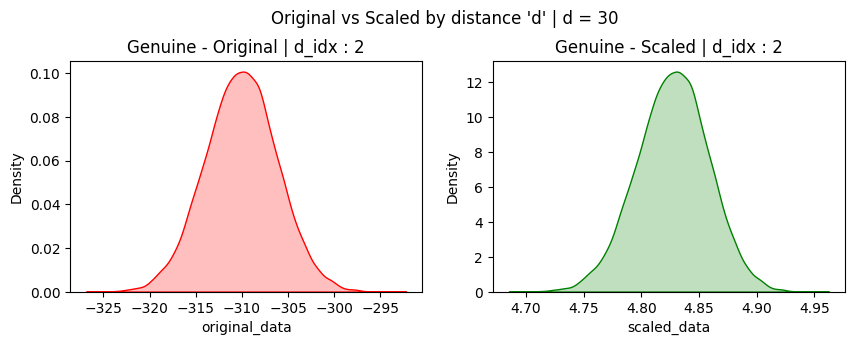

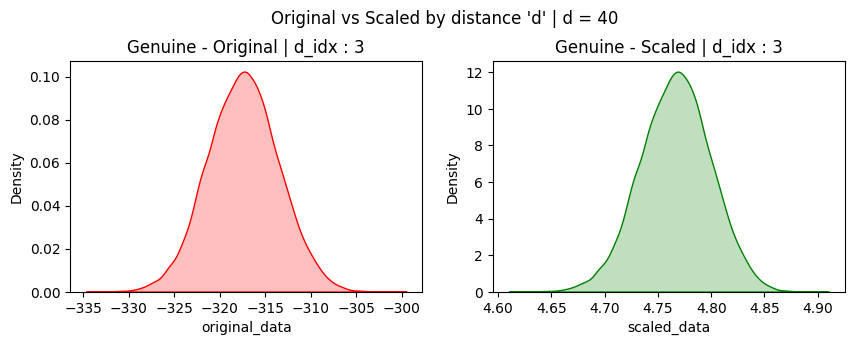

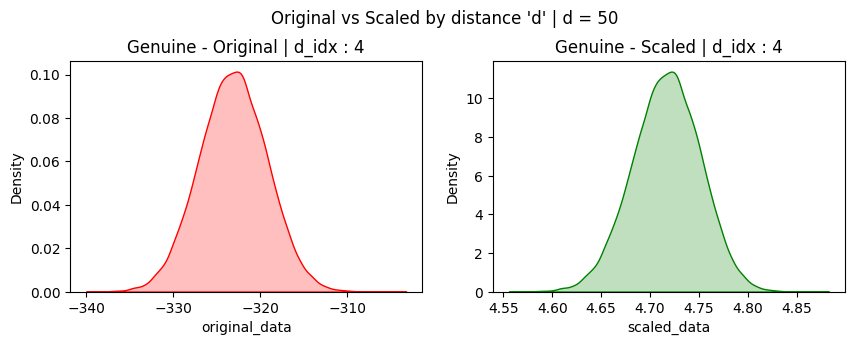

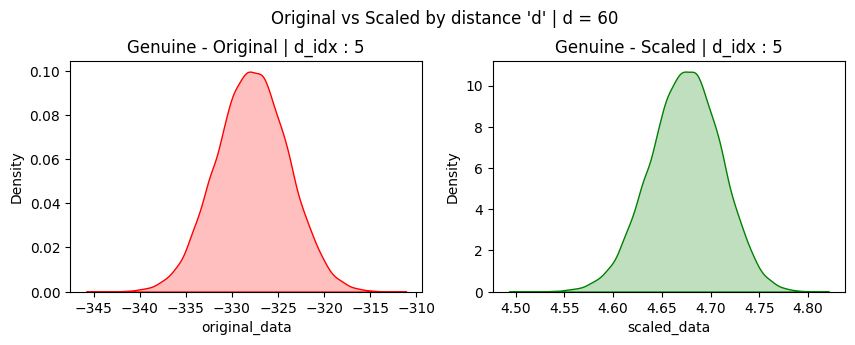

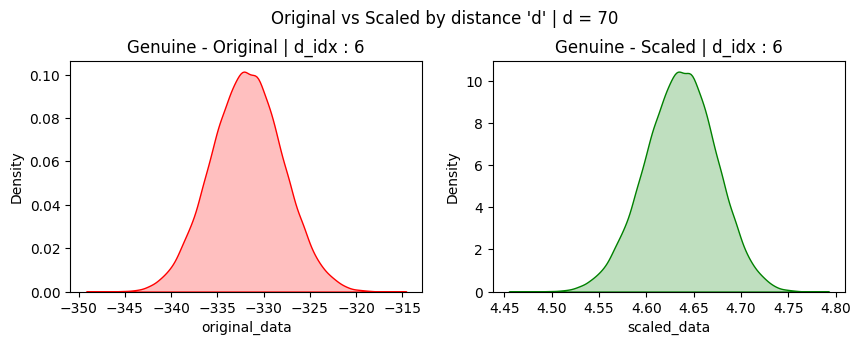

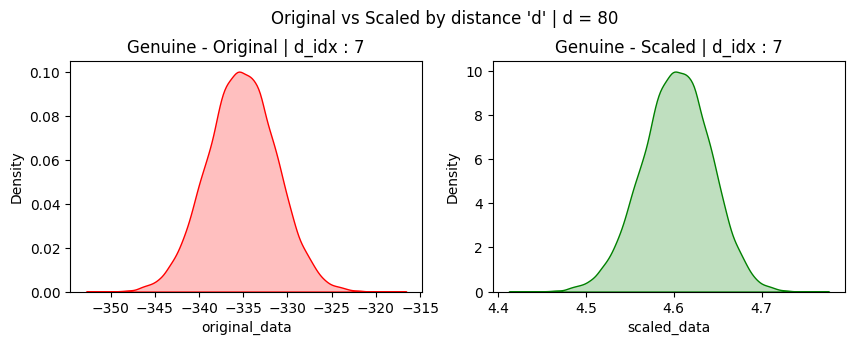

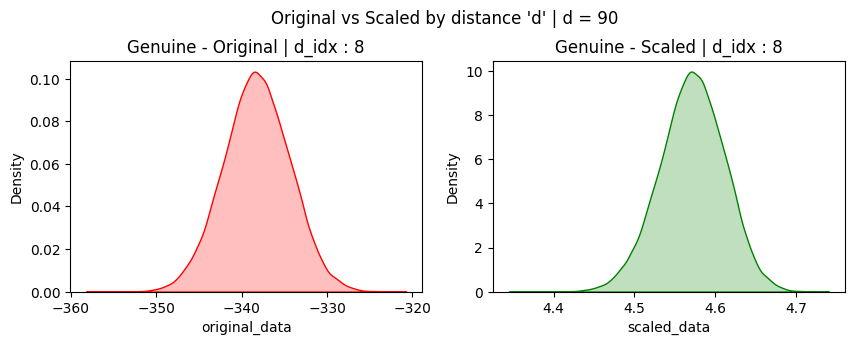

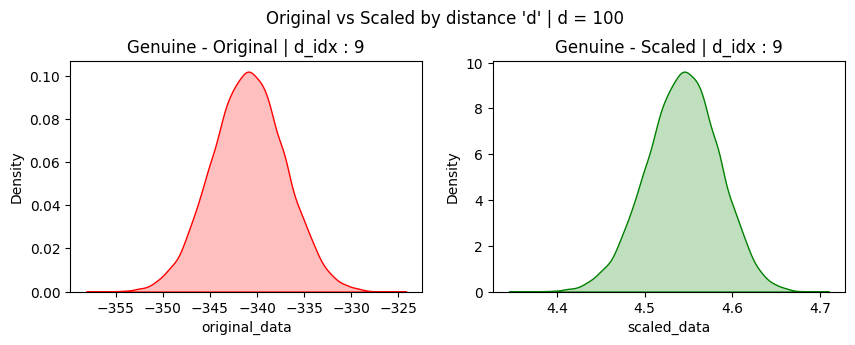

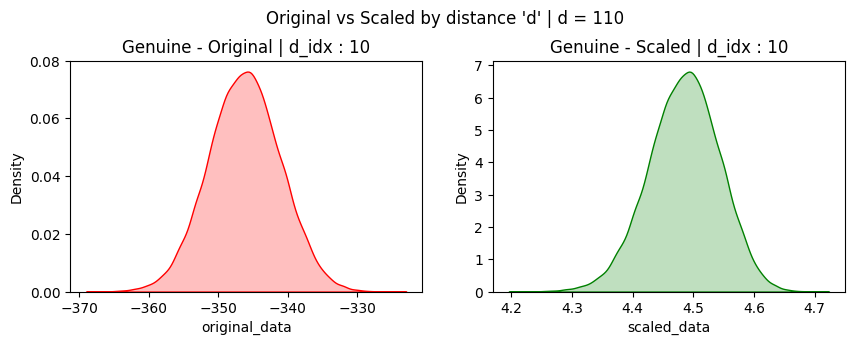

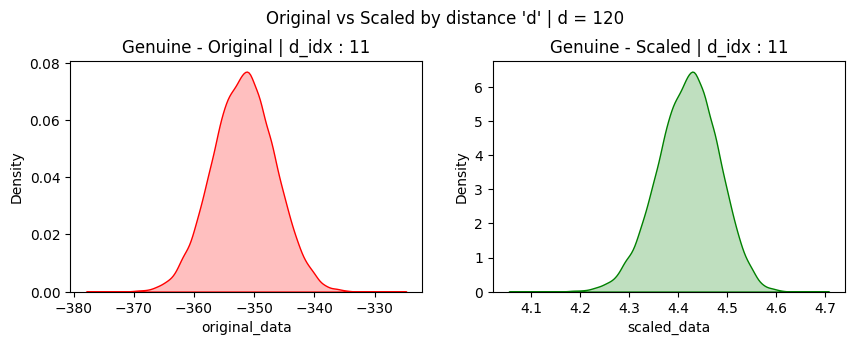

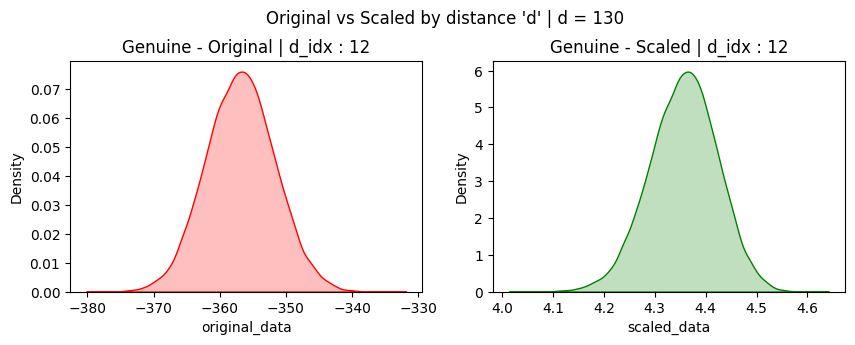

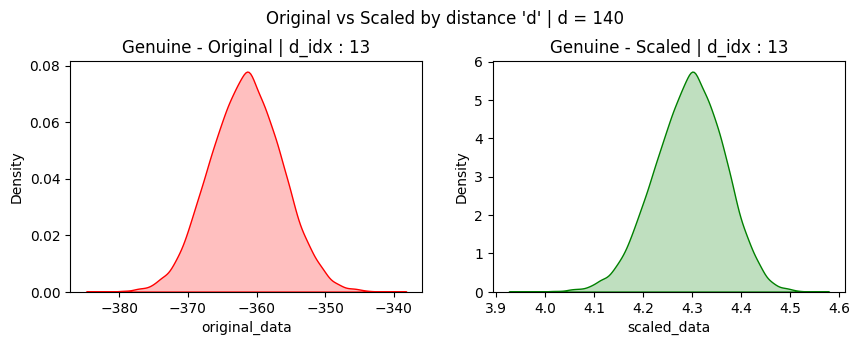

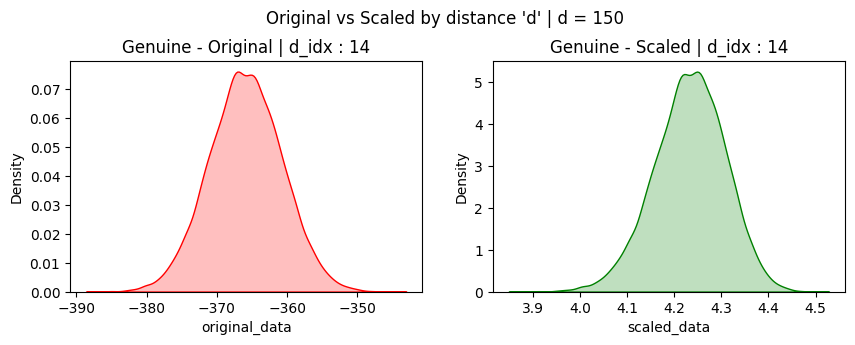

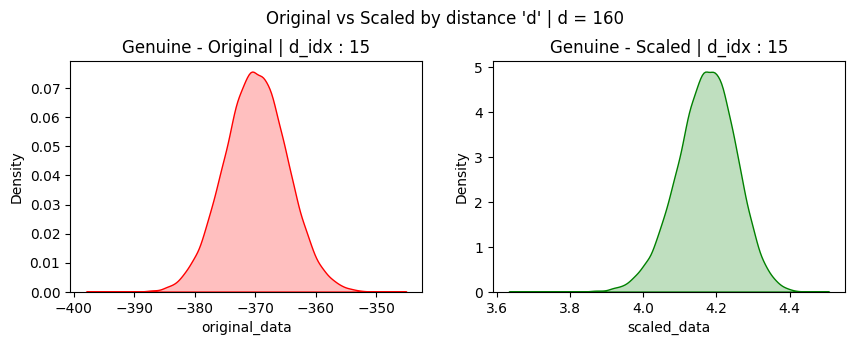

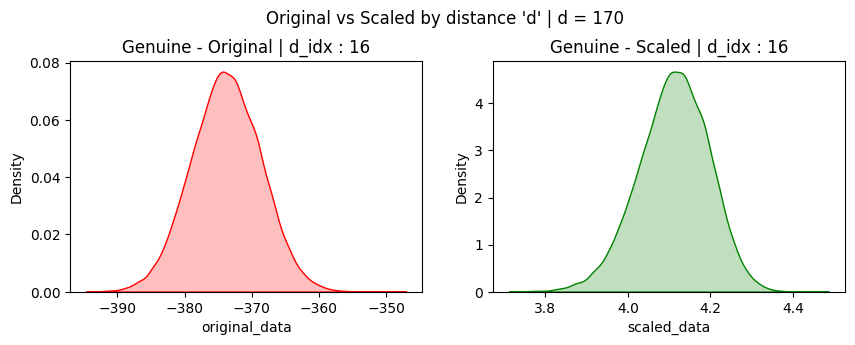

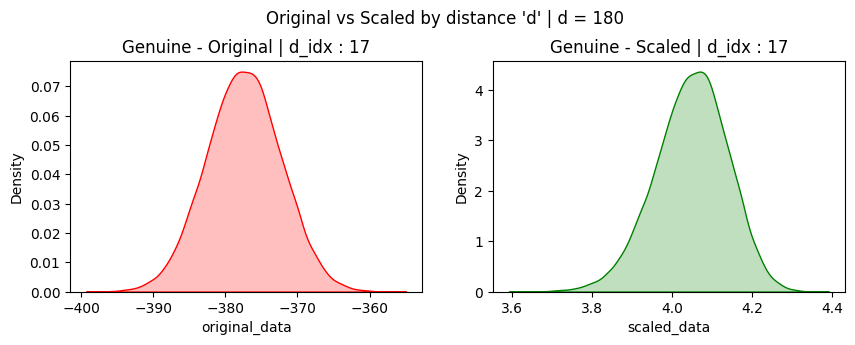

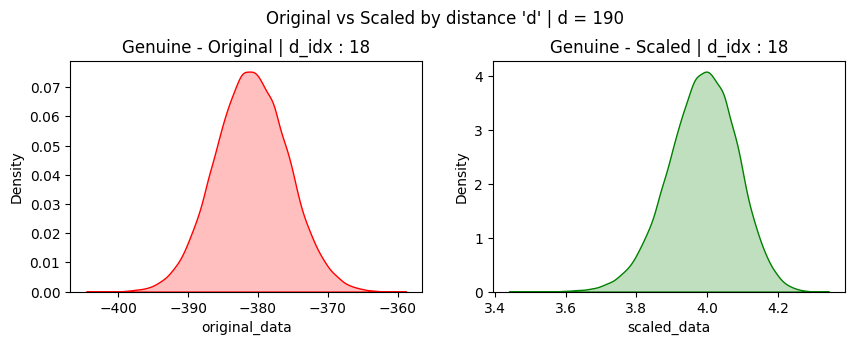

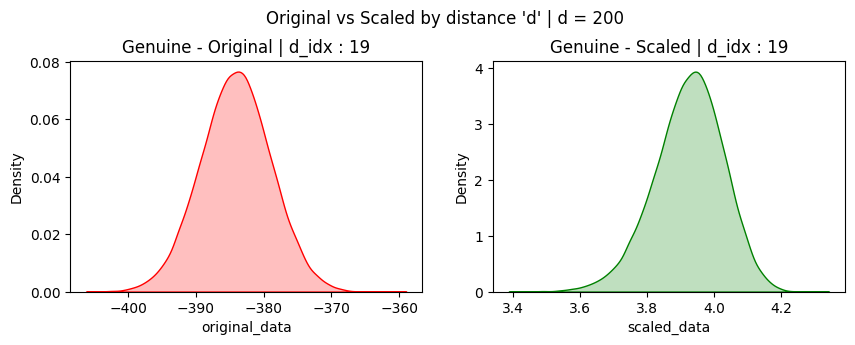

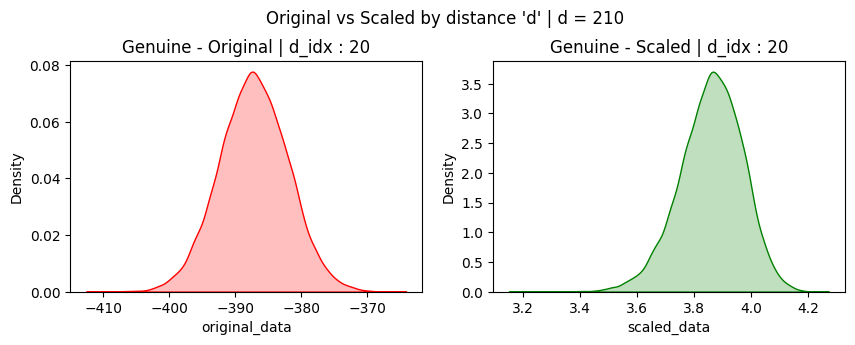

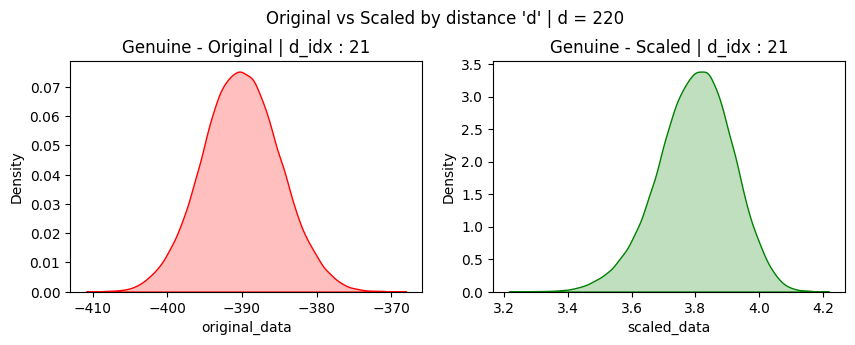

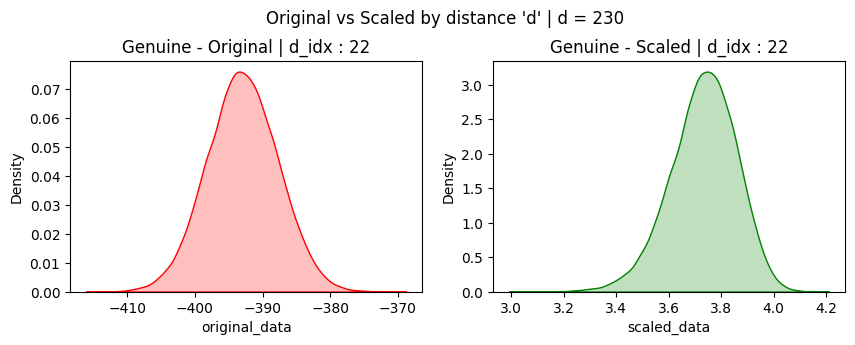

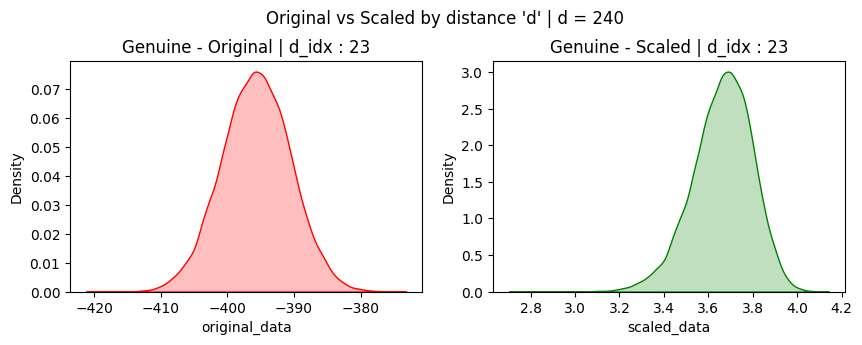

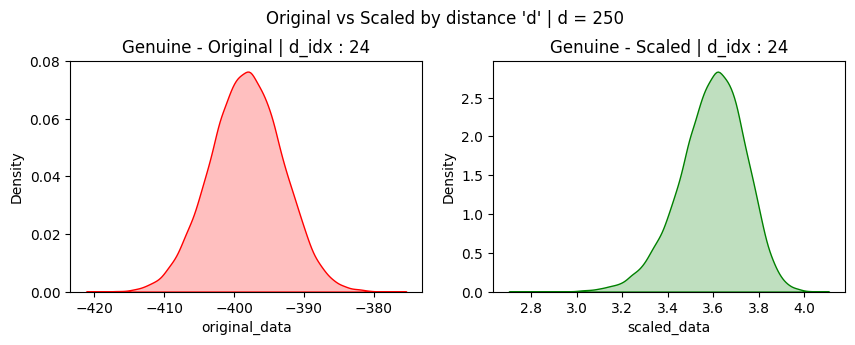

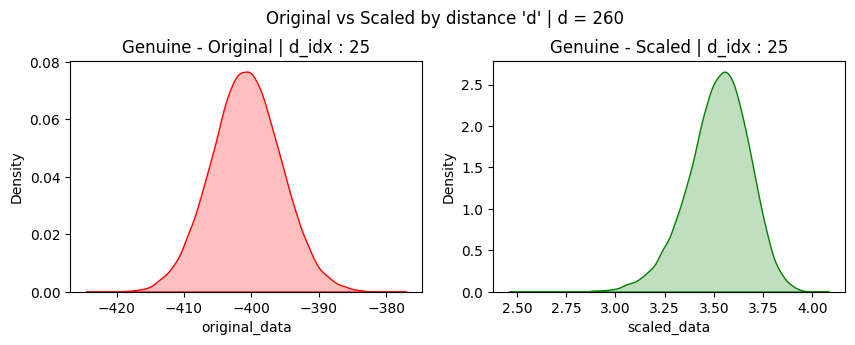

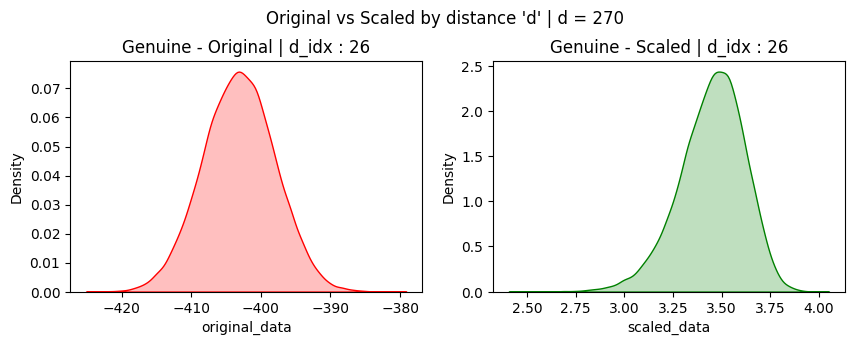

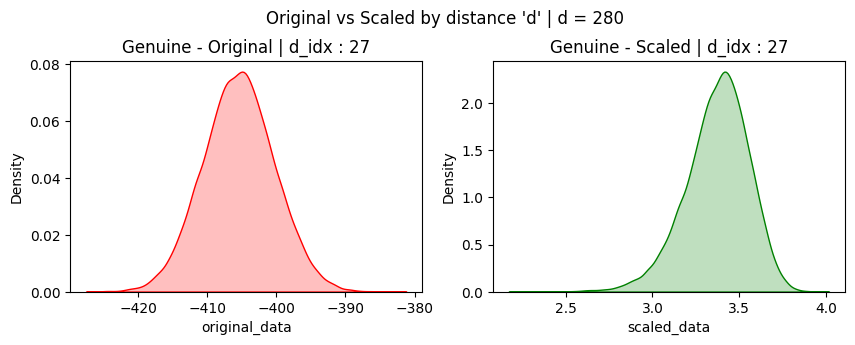

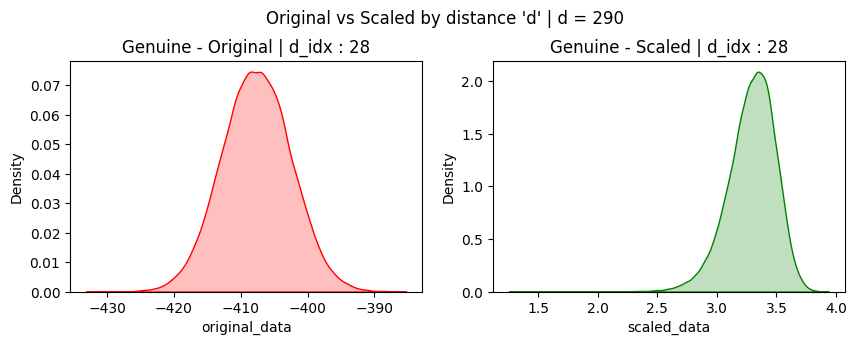

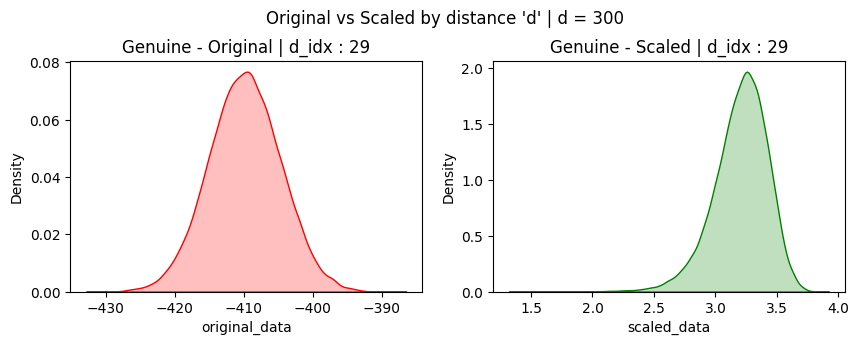

In [17]:
utils.plot_original_and_scaled_data_by_d(df_ln1_genuine)

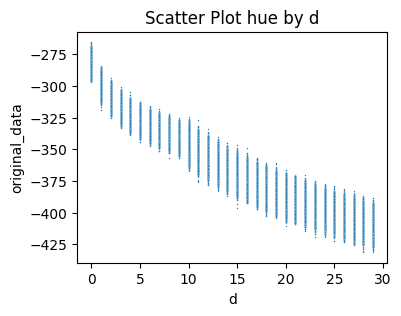

In [18]:
utils.plot_data_distribution_by_d(df_ln1_genuine)

## LogNormal 2

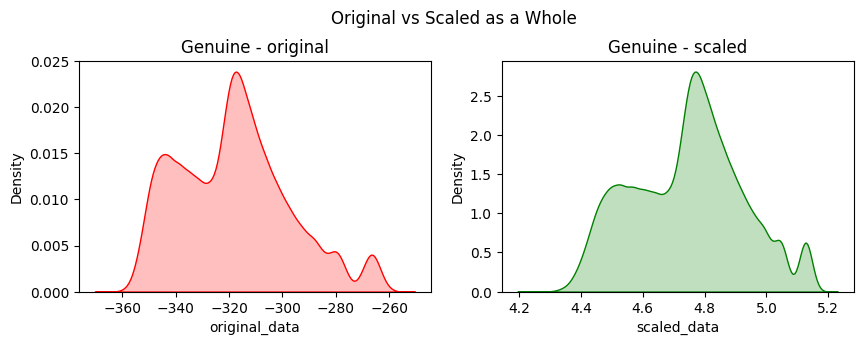

In [19]:
utils.plot_original_and_scaled_data(df_ln2_genuine)

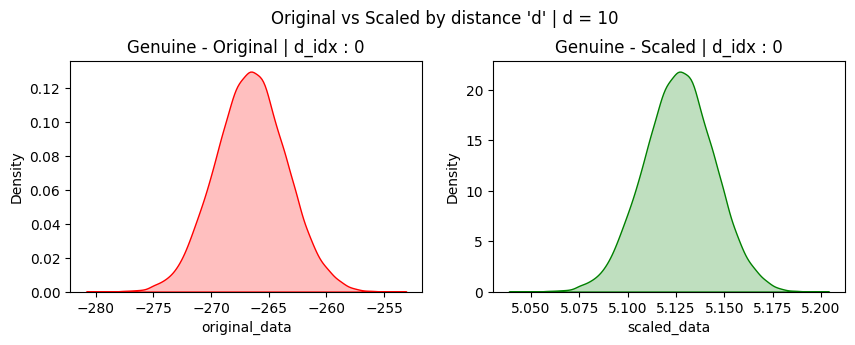

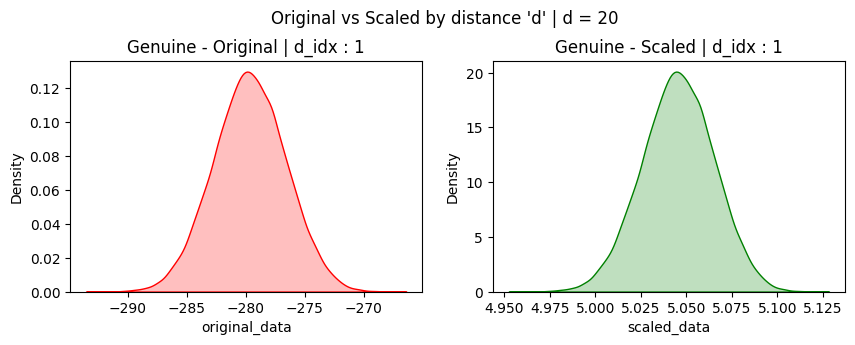

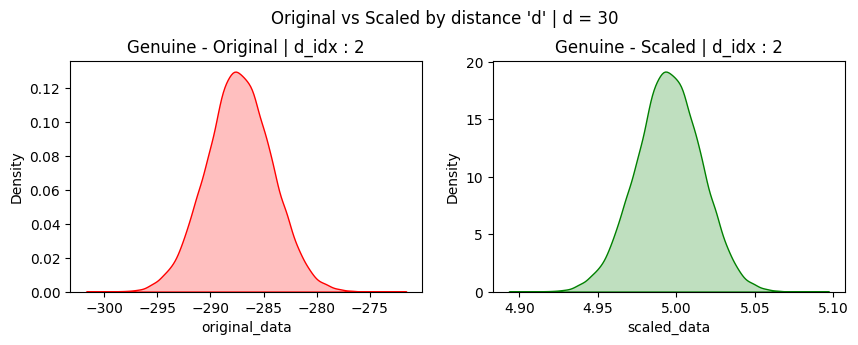

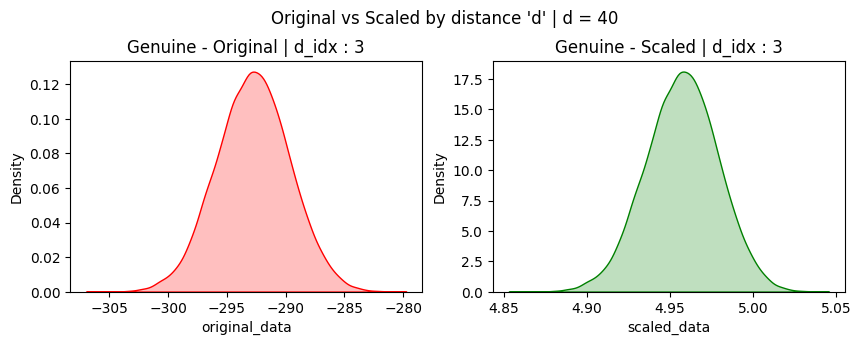

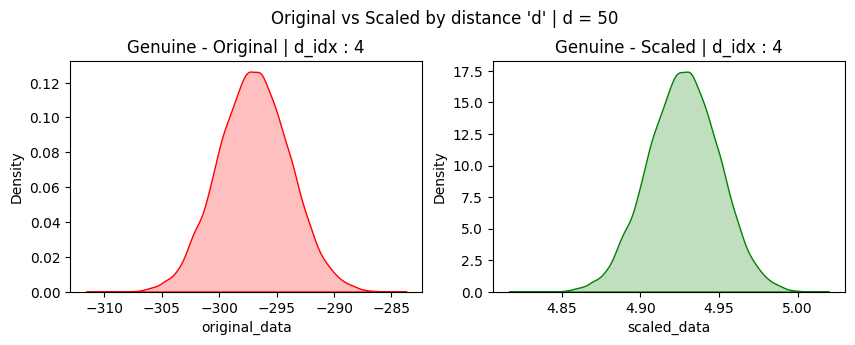

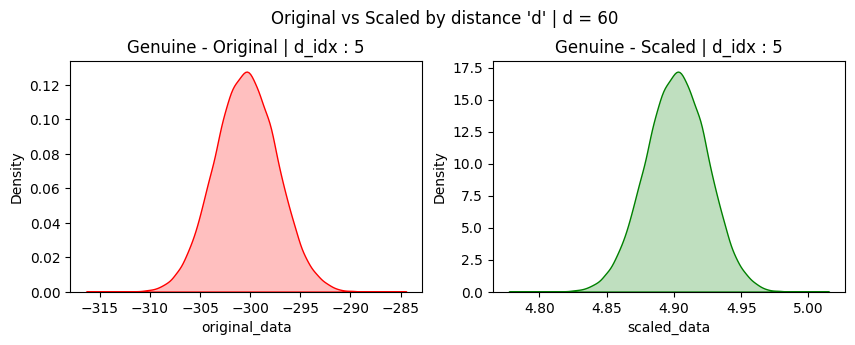

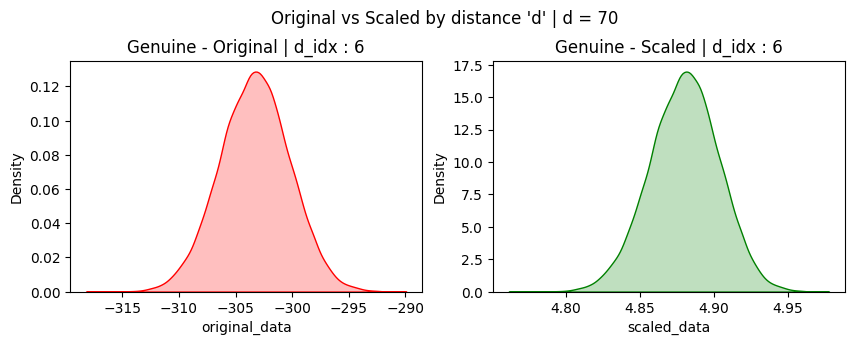

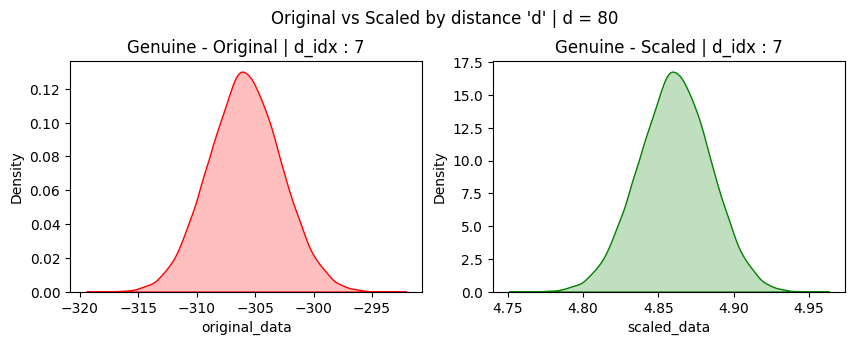

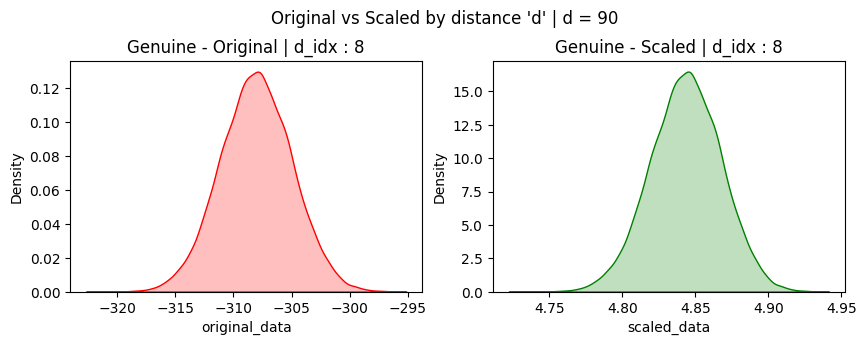

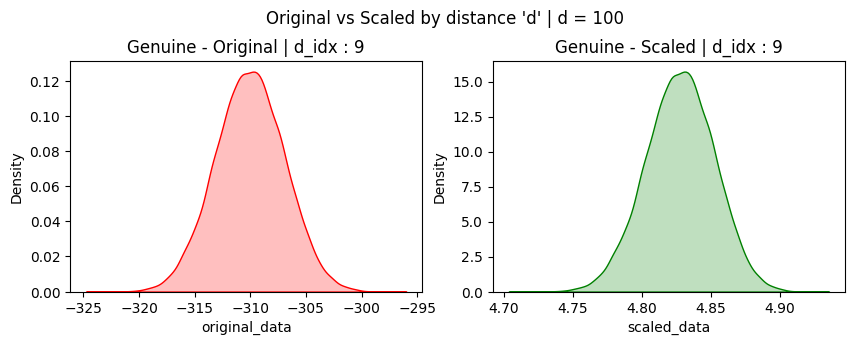

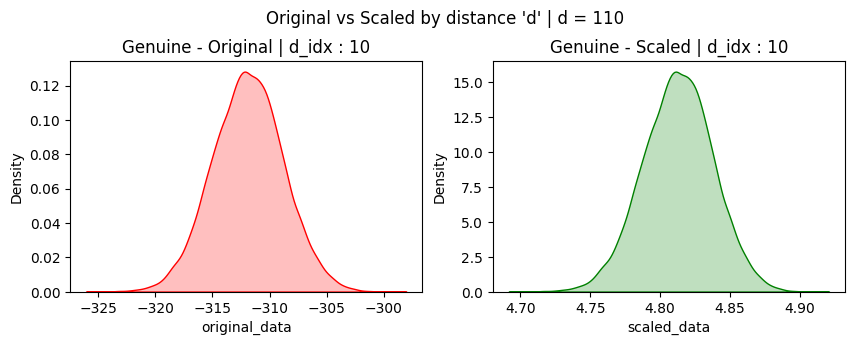

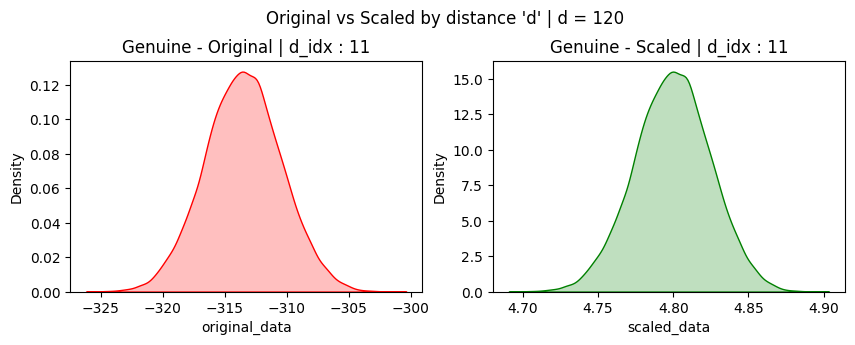

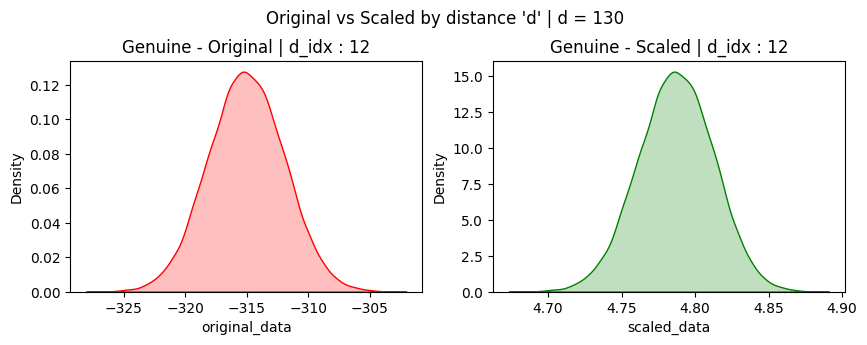

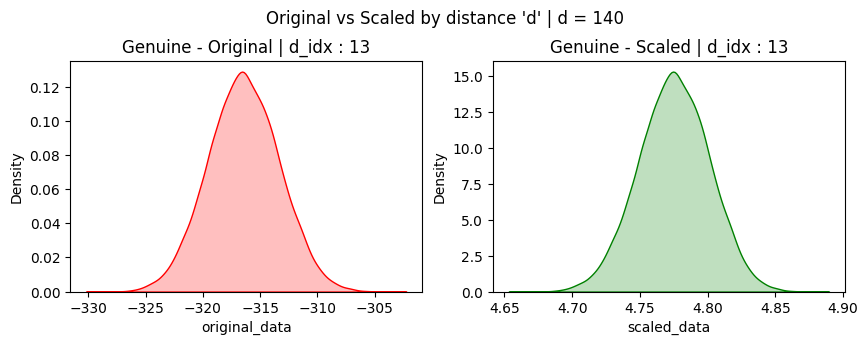

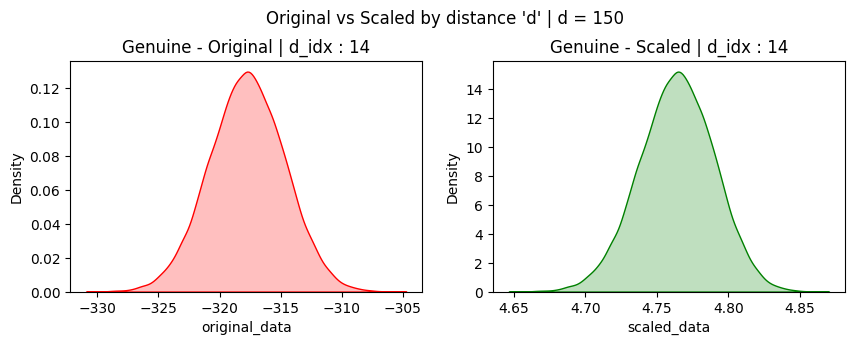

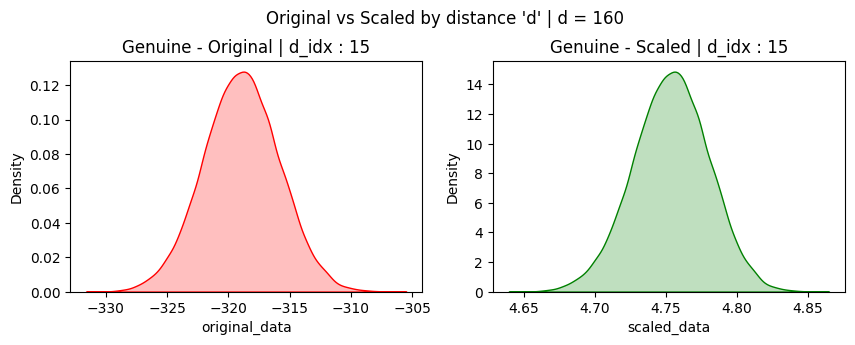

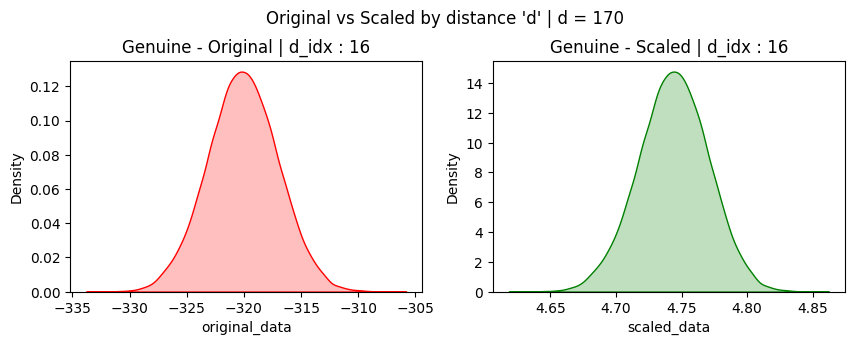

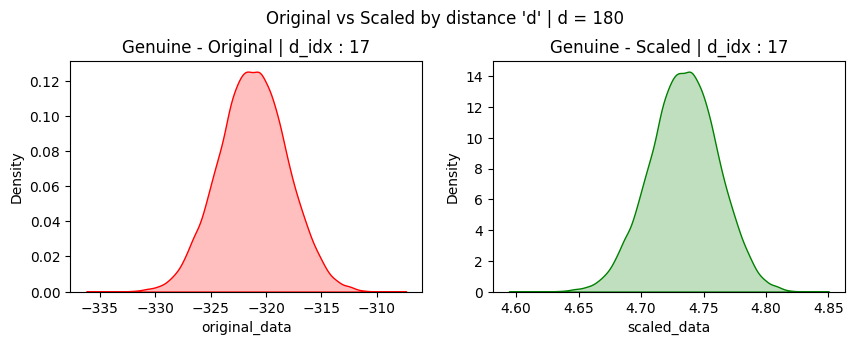

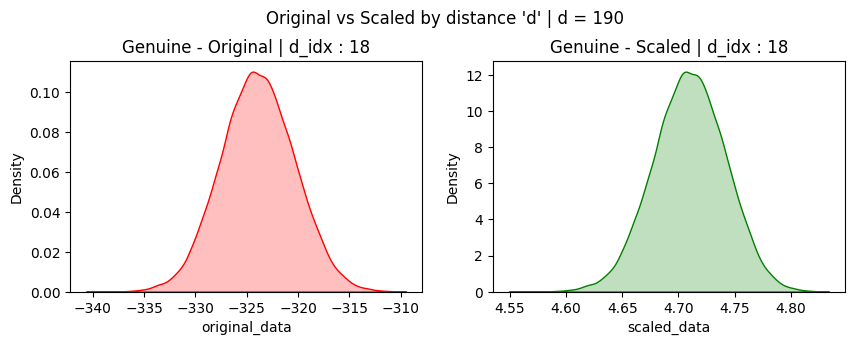

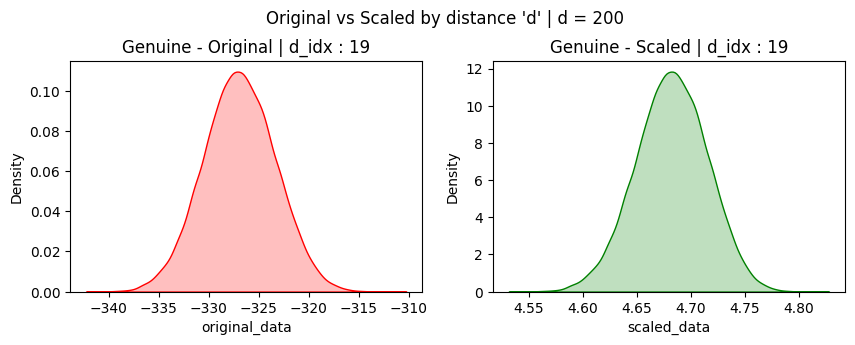

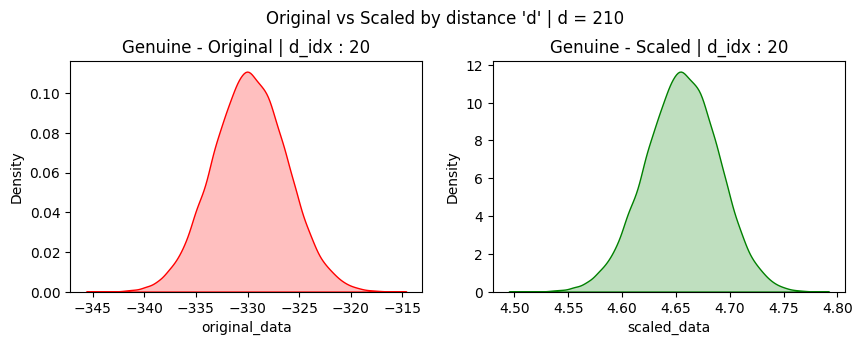

In [ ]:
utils.plot_original_and_scaled_data_by_d(df_ln2_genuine)

In [ ]:
utils.plot_data_distribution_by_d(df_ln2_genuine)